In [19]:
import numpy as np
import sys
import matplotlib.pyplot as plt
sys.path.append('../SourceCode')
import bastien_utils
import custom_regularizers
import datetime
import morphoMaths
from keras.layers import Input, Flatten, Dense, LeakyReLU, Reshape, ReLU
from keras import Model, constraints
import keras
import pandas as pd
keras.__version__

'2.2.0'

In [4]:
FILE_PATH = "../"
path_to_kl_div_sum = "../ShallowAE/Sparse/KL_div_sum/"
x_train, y_train, x_test, y_test, x_small, y_small = bastien_utils.load_data(FILE_PATH, train=True, test=True, subsetTest=True)
print('x_small shape:', x_small.shape)
print('x_test shape:', x_test.shape)

x_small shape: (10, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)


In [2]:
nb_rows = 28
nb_columns = 28
nb_input_channels=1
latent_dim = 100
nb_output_channels = 1

In [3]:
input_img = Input(shape=(nb_rows, nb_columns,nb_input_channels))  # adapt this if using `channels_first` image data format
x = Flatten()(input_img)
encoded = Dense(latent_dim, activation='sigmoid', 
                activity_regularizer=custom_regularizers.sparseness())(x)
encoder = Model(input_img, encoded, name='encoder')
encoded_img = Input(shape=(latent_dim,))  
x = Dense(nb_rows*nb_columns*nb_output_channels, kernel_constraint=constraints.non_neg())(encoded_img)
x = LeakyReLU(alpha=0.1)(x)
decoded = Reshape((nb_rows,nb_columns,nb_output_channels))(x)
decoder = Model(encoded_img, decoded, name='decoder')
encoded = encoder(input_img)
decoded = decoder(encoded)
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='mean_squared_error', metrics=['mse'])


In [5]:
autoencoder.fit(x_train, x_train, epochs=400, batch_size=128, shuffle=True, validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/400
60000/60000 [==============================] - 8s 125us/step - loss: 0.3893 - mean_squared_error: 0.0991 - val_loss: 0.2849 - val_mean_squared_error: 0.0858
Epoch 2/400
60000/60000 [==============================] - 6s 99us/step - loss: 0.2325 - mean_squared_error: 0.0876 - val_loss: 0.1822 - val_mean_squared_error: 0.0883
Epoch 3/400
60000/60000 [==============================] - 6s 101us/step - loss: 0.1521 - mean_squared_error: 0.0892 - val_loss: 0.1109 - val_mean_squared_error: 0.0985
Epoch 4/400
60000/60000 [==============================] - 6s 104us/step - loss: 0.0999 - mean_squared_error: 0.0900 - val_loss: 0.0948 - val_mean_squared_error: 0.0873
Epoch 5/400
60000/60000 [==============================] - 6s 93us/step - loss: 0.0945 - mean_squared_error: 0.0875 - val_loss: 0.0927 - val_mean_squared_error: 0.0870
Epoch 6/400
60000/60000 [==============================] - 5s 89us/step - loss: 0.0928 - mean_squared_error

60000/60000 [==============================] - 5s 85us/step - loss: 0.0633 - mean_squared_error: 0.0628 - val_loss: 0.0633 - val_mean_squared_error: 0.0628
Epoch 98/400
60000/60000 [==============================] - 5s 85us/step - loss: 0.0633 - mean_squared_error: 0.0628 - val_loss: 0.0626 - val_mean_squared_error: 0.0621
Epoch 99/400
60000/60000 [==============================] - 5s 84us/step - loss: 0.0634 - mean_squared_error: 0.0629 - val_loss: 0.0631 - val_mean_squared_error: 0.0626
Epoch 100/400
60000/60000 [==============================] - 5s 84us/step - loss: 0.0634 - mean_squared_error: 0.0629 - val_loss: 0.0634 - val_mean_squared_error: 0.0629
Epoch 101/400
60000/60000 [==============================] - 5s 84us/step - loss: 0.0634 - mean_squared_error: 0.0629 - val_loss: 0.0627 - val_mean_squared_error: 0.0622
Epoch 102/400
60000/60000 [==============================] - 5s 85us/step - loss: 0.0633 - mean_squared_error: 0.0628 - val_loss: 0.0639 - val_mean_squared_error: 0.0

60000/60000 [==============================] - 5s 87us/step - loss: 0.0631 - mean_squared_error: 0.0628 - val_loss: 0.0630 - val_mean_squared_error: 0.0628
Epoch 194/400
60000/60000 [==============================] - 5s 89us/step - loss: 0.0632 - mean_squared_error: 0.0629 - val_loss: 0.0623 - val_mean_squared_error: 0.0620
Epoch 195/400
60000/60000 [==============================] - 5s 85us/step - loss: 0.0629 - mean_squared_error: 0.0626 - val_loss: 0.0627 - val_mean_squared_error: 0.0624
Epoch 196/400
60000/60000 [==============================] - 5s 87us/step - loss: 0.0630 - mean_squared_error: 0.0628 - val_loss: 0.0624 - val_mean_squared_error: 0.0621
Epoch 197/400
60000/60000 [==============================] - 5s 87us/step - loss: 0.0631 - mean_squared_error: 0.0628 - val_loss: 0.0626 - val_mean_squared_error: 0.0623
Epoch 198/400
60000/60000 [==============================] - 5s 87us/step - loss: 0.0633 - mean_squared_error: 0.0630 - val_loss: 0.0628 - val_mean_squared_error: 0

60000/60000 [==============================] - 6s 94us/step - loss: 0.0630 - mean_squared_error: 0.0628 - val_loss: 0.0624 - val_mean_squared_error: 0.0622
Epoch 290/400
60000/60000 [==============================] - 6s 95us/step - loss: 0.0630 - mean_squared_error: 0.0628 - val_loss: 0.0629 - val_mean_squared_error: 0.0628
Epoch 291/400
60000/60000 [==============================] - 6s 94us/step - loss: 0.0630 - mean_squared_error: 0.0628 - val_loss: 0.0622 - val_mean_squared_error: 0.0620
Epoch 292/400
60000/60000 [==============================] - 6s 98us/step - loss: 0.0630 - mean_squared_error: 0.0628 - val_loss: 0.0622 - val_mean_squared_error: 0.0620
Epoch 293/400
60000/60000 [==============================] - 6s 95us/step - loss: 0.0630 - mean_squared_error: 0.0628 - val_loss: 0.0625 - val_mean_squared_error: 0.0624
Epoch 294/400
60000/60000 [==============================] - 6s 103us/step - loss: 0.0630 - mean_squared_error: 0.0628 - val_loss: 0.0628 - val_mean_squared_error: 

Epoch 385/400
60000/60000 [==============================] - 6s 93us/step - loss: 0.0630 - mean_squared_error: 0.0628 - val_loss: 0.0630 - val_mean_squared_error: 0.0628
Epoch 386/400
60000/60000 [==============================] - 6s 102us/step - loss: 0.0629 - mean_squared_error: 0.0628 - val_loss: 0.0623 - val_mean_squared_error: 0.0622
Epoch 387/400
60000/60000 [==============================] - 7s 115us/step - loss: 0.0629 - mean_squared_error: 0.0628 - val_loss: 0.0631 - val_mean_squared_error: 0.0630
Epoch 388/400
60000/60000 [==============================] - 5s 88us/step - loss: 0.0630 - mean_squared_error: 0.0629 - val_loss: 0.0627 - val_mean_squared_error: 0.0626
Epoch 389/400
60000/60000 [==============================] - 5s 89us/step - loss: 0.0631 - mean_squared_error: 0.0629 - val_loss: 0.0627 - val_mean_squared_error: 0.0625
Epoch 390/400
60000/60000 [==============================] - 5s 86us/step - loss: 0.0630 - mean_squared_error: 0.0628 - val_loss: 0.0624 - val_mean_

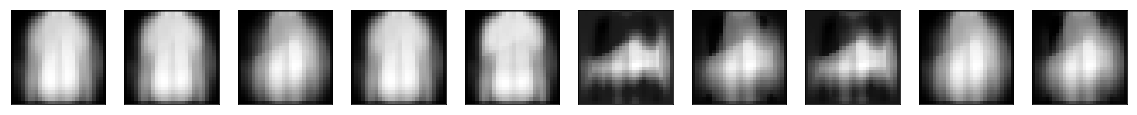

In [6]:
bastien_utils.plot_all_images(autoencoder.predict(x_small))

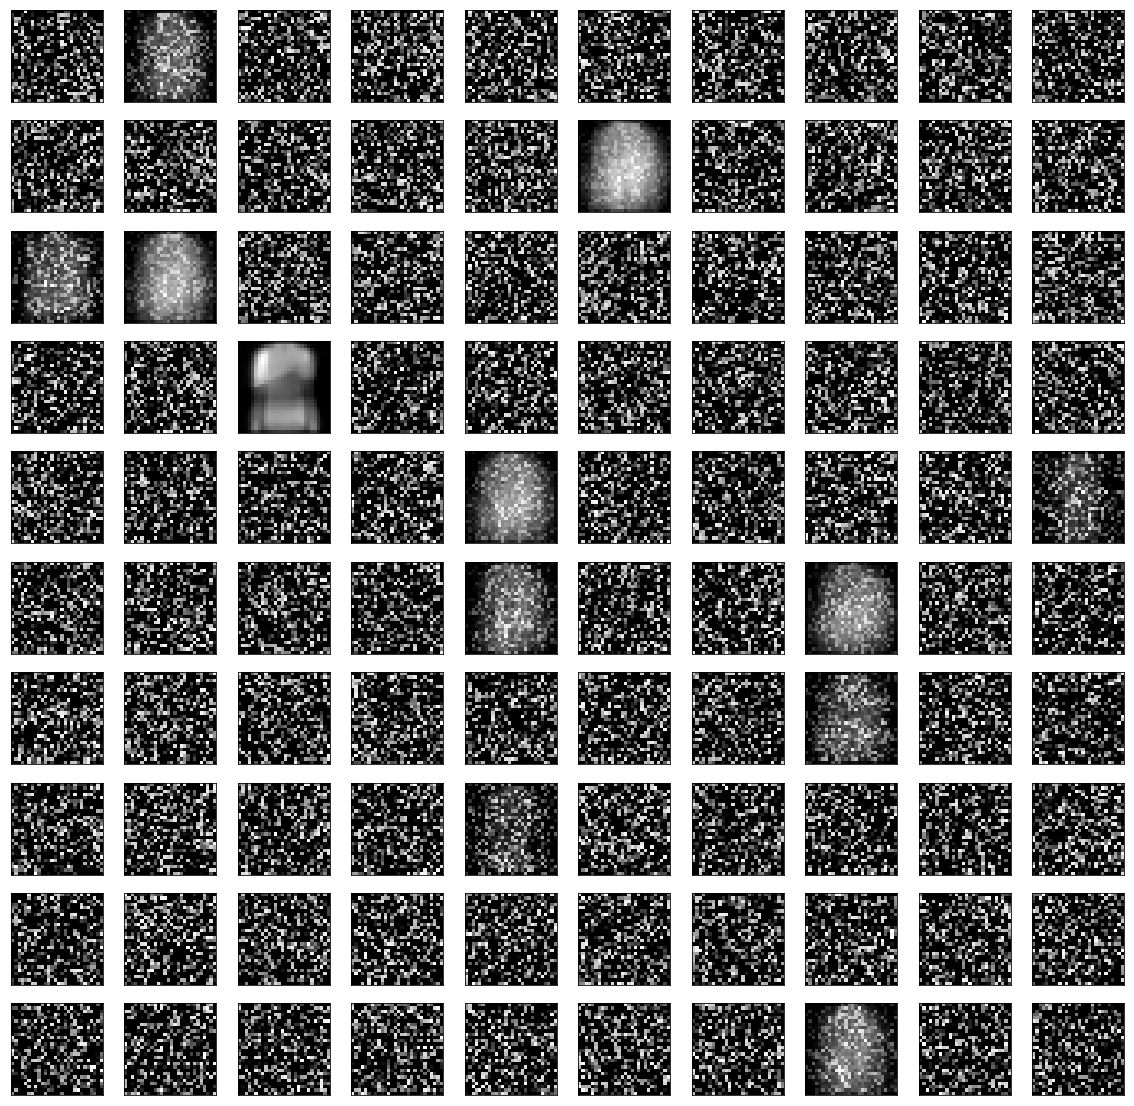

In [8]:
bastien_utils.plot_all_images(decoder.get_weights()[0].reshape((100,28,28,1)))

In [9]:
input_img = Input(shape=(nb_rows, nb_columns,nb_input_channels))  # adapt this if using `channels_first` image data format
x = Flatten()(input_img)
encoded = Dense(latent_dim, activation='sigmoid', 
                activity_regularizer=custom_regularizers.sparseness(beta=0.1))(x)
encoder = Model(input_img, encoded, name='encoder')
encoded_img = Input(shape=(latent_dim,))  
x = Dense(nb_rows*nb_columns*nb_output_channels, kernel_constraint=constraints.non_neg())(encoded_img)
x = LeakyReLU(alpha=0.1)(x)
decoded = Reshape((nb_rows,nb_columns,nb_output_channels))(x)
decoder = Model(encoded_img, decoded, name='decoder')
encoded = encoder(input_img)
decoded = decoder(encoded)
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='mean_squared_error', metrics=['mse'])


In [10]:
autoencoder.fit(x_train, x_train, epochs=400, batch_size=128, shuffle=True, validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/400
60000/60000 [==============================] - 7s 110us/step - loss: 0.1430 - mean_squared_error: 0.0991 - val_loss: 0.1051 - val_mean_squared_error: 0.0718
Epoch 2/400
60000/60000 [==============================] - 6s 102us/step - loss: 0.0951 - mean_squared_error: 0.0644 - val_loss: 0.0870 - val_mean_squared_error: 0.0585
Epoch 3/400
60000/60000 [==============================] - 6s 101us/step - loss: 0.0831 - mean_squared_error: 0.0557 - val_loss: 0.0790 - val_mean_squared_error: 0.0528
Epoch 4/400
60000/60000 [==============================] - 6s 101us/step - loss: 0.0765 - mean_squared_error: 0.0511 - val_loss: 0.0738 - val_mean_squared_error: 0.0491
Epoch 5/400
60000/60000 [==============================] - 6s 100us/step - loss: 0.0722 - mean_squared_error: 0.0479 - val_loss: 0.0702 - val_mean_squared_error: 0.0463
Epoch 6/400
60000/60000 [==============================] - 6s 102us/step - loss: 0.0688 - mean_squared_er

60000/60000 [==============================] - 6s 105us/step - loss: 0.0410 - mean_squared_error: 0.0282 - val_loss: 0.0409 - val_mean_squared_error: 0.0281
Epoch 50/400
60000/60000 [==============================] - 6s 102us/step - loss: 0.0409 - mean_squared_error: 0.0282 - val_loss: 0.0408 - val_mean_squared_error: 0.0281
Epoch 51/400
60000/60000 [==============================] - 6s 92us/step - loss: 0.0408 - mean_squared_error: 0.0281 - val_loss: 0.0407 - val_mean_squared_error: 0.0281
Epoch 52/400
60000/60000 [==============================] - 6s 98us/step - loss: 0.0407 - mean_squared_error: 0.0281 - val_loss: 0.0406 - val_mean_squared_error: 0.0281
Epoch 53/400
60000/60000 [==============================] - 6s 99us/step - loss: 0.0406 - mean_squared_error: 0.0281 - val_loss: 0.0405 - val_mean_squared_error: 0.0281
Epoch 54/400
60000/60000 [==============================] - 6s 96us/step - loss: 0.0405 - mean_squared_error: 0.0281 - val_loss: 0.0404 - val_mean_squared_error: 0.02

60000/60000 [==============================] - 5s 89us/step - loss: 0.0366 - mean_squared_error: 0.0279 - val_loss: 0.0366 - val_mean_squared_error: 0.0279
Epoch 146/400
60000/60000 [==============================] - 5s 88us/step - loss: 0.0366 - mean_squared_error: 0.0279 - val_loss: 0.0366 - val_mean_squared_error: 0.0279
Epoch 147/400
60000/60000 [==============================] - 5s 88us/step - loss: 0.0366 - mean_squared_error: 0.0279 - val_loss: 0.0366 - val_mean_squared_error: 0.0279
Epoch 148/400
60000/60000 [==============================] - 5s 89us/step - loss: 0.0365 - mean_squared_error: 0.0279 - val_loss: 0.0366 - val_mean_squared_error: 0.0279
Epoch 149/400
60000/60000 [==============================] - 5s 89us/step - loss: 0.0365 - mean_squared_error: 0.0279 - val_loss: 0.0366 - val_mean_squared_error: 0.0280
Epoch 150/400
60000/60000 [==============================] - 5s 89us/step - loss: 0.0365 - mean_squared_error: 0.0279 - val_loss: 0.0365 - val_mean_squared_error: 0

60000/60000 [==============================] - 6s 98us/step - loss: 0.0357 - mean_squared_error: 0.0281 - val_loss: 0.0358 - val_mean_squared_error: 0.0282
Epoch 242/400
60000/60000 [==============================] - 6s 98us/step - loss: 0.0357 - mean_squared_error: 0.0281 - val_loss: 0.0358 - val_mean_squared_error: 0.0282
Epoch 243/400
60000/60000 [==============================] - 6s 98us/step - loss: 0.0357 - mean_squared_error: 0.0281 - val_loss: 0.0358 - val_mean_squared_error: 0.0282
Epoch 244/400
60000/60000 [==============================] - 6s 100us/step - loss: 0.0357 - mean_squared_error: 0.0281 - val_loss: 0.0358 - val_mean_squared_error: 0.0282
Epoch 245/400
60000/60000 [==============================] - 6s 101us/step - loss: 0.0357 - mean_squared_error: 0.0281 - val_loss: 0.0358 - val_mean_squared_error: 0.0282
Epoch 246/400
60000/60000 [==============================] - 6s 101us/step - loss: 0.0357 - mean_squared_error: 0.0281 - val_loss: 0.0358 - val_mean_squared_error

60000/60000 [==============================] - 5s 87us/step - loss: 0.0352 - mean_squared_error: 0.0281 - val_loss: 0.0354 - val_mean_squared_error: 0.0284
Epoch 338/400
60000/60000 [==============================] - 5s 88us/step - loss: 0.0352 - mean_squared_error: 0.0281 - val_loss: 0.0354 - val_mean_squared_error: 0.0283
Epoch 339/400
60000/60000 [==============================] - 5s 88us/step - loss: 0.0352 - mean_squared_error: 0.0281 - val_loss: 0.0354 - val_mean_squared_error: 0.0283
Epoch 340/400
60000/60000 [==============================] - 5s 87us/step - loss: 0.0352 - mean_squared_error: 0.0281 - val_loss: 0.0354 - val_mean_squared_error: 0.0284
Epoch 341/400
60000/60000 [==============================] - 5s 88us/step - loss: 0.0352 - mean_squared_error: 0.0281 - val_loss: 0.0354 - val_mean_squared_error: 0.0283
Epoch 342/400
60000/60000 [==============================] - 5s 88us/step - loss: 0.0352 - mean_squared_error: 0.0281 - val_loss: 0.0354 - val_mean_squared_error: 0

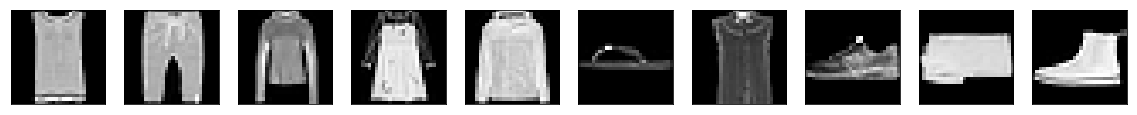

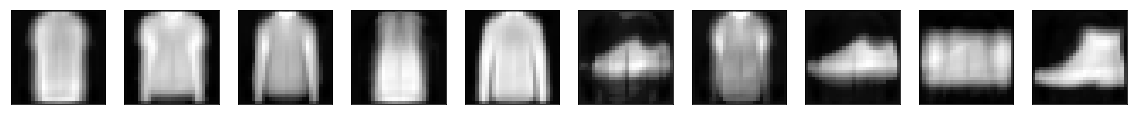

In [13]:
bastien_utils.plot_all_images(x_small)
bastien_utils.plot_all_images(autoencoder.predict(x_small))

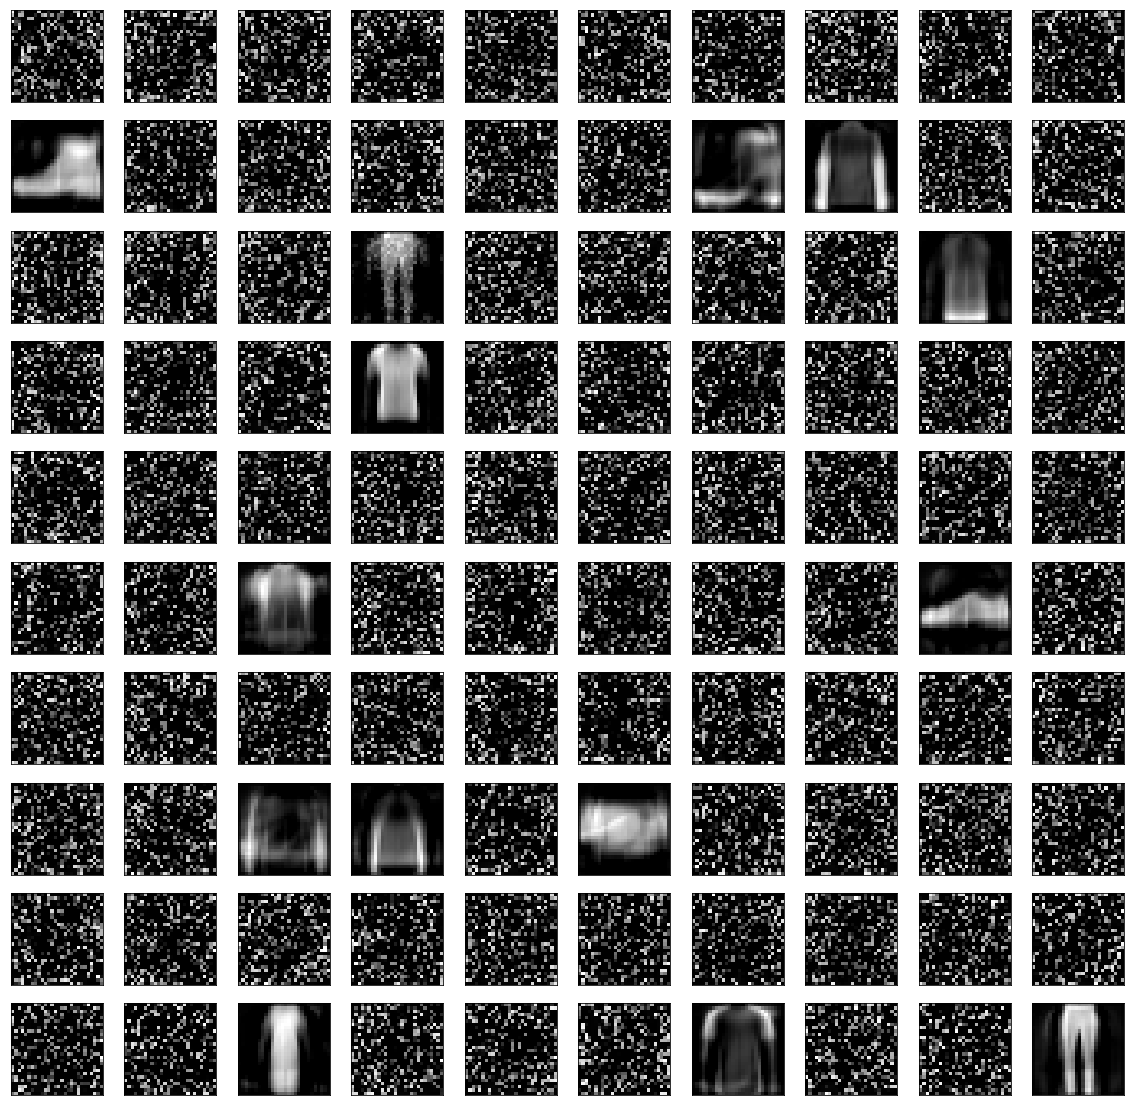

In [14]:
bastien_utils.plot_all_images(decoder.get_weights()[0].reshape((100,28,28,1)))

# 3

In [15]:
input_img = Input(shape=(nb_rows, nb_columns,nb_input_channels))  # adapt this if using `channels_first` image data format
x = Flatten()(input_img)
encoded = Dense(latent_dim, activation='sigmoid', 
                activity_regularizer=custom_regularizers.sparseness(beta=0.01))(x)
encoder = Model(input_img, encoded, name='encoder')
encoded_img = Input(shape=(latent_dim,))  
x = Dense(nb_rows*nb_columns*nb_output_channels, kernel_constraint=constraints.non_neg())(encoded_img)
x = LeakyReLU(alpha=0.1)(x)
decoded = Reshape((nb_rows,nb_columns,nb_output_channels))(x)
decoder = Model(encoded_img, decoded, name='decoder')
encoded = encoder(input_img)
decoded = decoder(encoded)
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='mean_squared_error', metrics=['mse'])


In [16]:
autoencoder.fit(x_train, x_train, epochs=400, batch_size=128, shuffle=True, validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/400
60000/60000 [==============================] - 7s 121us/step - loss: 0.1063 - mean_squared_error: 0.1004 - val_loss: 0.0762 - val_mean_squared_error: 0.0713
Epoch 2/400
60000/60000 [==============================] - 7s 111us/step - loss: 0.0684 - mean_squared_error: 0.0638 - val_loss: 0.0622 - val_mean_squared_error: 0.0578
Epoch 3/400
60000/60000 [==============================] - 6s 107us/step - loss: 0.0593 - mean_squared_error: 0.0550 - val_loss: 0.0560 - val_mean_squared_error: 0.0519
Epoch 4/400
60000/60000 [==============================] - 5s 91us/step - loss: 0.0539 - mean_squared_error: 0.0498 - val_loss: 0.0513 - val_mean_squared_error: 0.0473
Epoch 5/400
60000/60000 [==============================] - 6s 96us/step - loss: 0.0497 - mean_squared_error: 0.0457 - val_loss: 0.0476 - val_mean_squared_error: 0.0437
Epoch 6/400
60000/60000 [==============================] - 5s 88us/step - loss: 0.0463 - mean_squared_error

60000/60000 [==============================] - 5s 86us/step - loss: 0.0226 - mean_squared_error: 0.0194 - val_loss: 0.0226 - val_mean_squared_error: 0.0194
Epoch 98/400
60000/60000 [==============================] - 5s 86us/step - loss: 0.0226 - mean_squared_error: 0.0194 - val_loss: 0.0226 - val_mean_squared_error: 0.0194
Epoch 99/400
60000/60000 [==============================] - 5s 86us/step - loss: 0.0226 - mean_squared_error: 0.0194 - val_loss: 0.0225 - val_mean_squared_error: 0.0194
Epoch 100/400
60000/60000 [==============================] - 5s 87us/step - loss: 0.0225 - mean_squared_error: 0.0194 - val_loss: 0.0225 - val_mean_squared_error: 0.0193
Epoch 101/400
60000/60000 [==============================] - 5s 86us/step - loss: 0.0225 - mean_squared_error: 0.0193 - val_loss: 0.0225 - val_mean_squared_error: 0.0193
Epoch 102/400
60000/60000 [==============================] - 5s 86us/step - loss: 0.0225 - mean_squared_error: 0.0193 - val_loss: 0.0225 - val_mean_squared_error: 0.0

60000/60000 [==============================] - 5s 85us/step - loss: 0.0215 - mean_squared_error: 0.0183 - val_loss: 0.0215 - val_mean_squared_error: 0.0183
Epoch 194/400
60000/60000 [==============================] - 5s 85us/step - loss: 0.0215 - mean_squared_error: 0.0183 - val_loss: 0.0215 - val_mean_squared_error: 0.0183
Epoch 195/400
60000/60000 [==============================] - 5s 86us/step - loss: 0.0215 - mean_squared_error: 0.0183 - val_loss: 0.0215 - val_mean_squared_error: 0.0183
Epoch 196/400
60000/60000 [==============================] - 5s 86us/step - loss: 0.0215 - mean_squared_error: 0.0183 - val_loss: 0.0215 - val_mean_squared_error: 0.0183
Epoch 197/400
60000/60000 [==============================] - 5s 86us/step - loss: 0.0215 - mean_squared_error: 0.0183 - val_loss: 0.0215 - val_mean_squared_error: 0.0183
Epoch 198/400
60000/60000 [==============================] - 5s 87us/step - loss: 0.0215 - mean_squared_error: 0.0183 - val_loss: 0.0215 - val_mean_squared_error: 0

60000/60000 [==============================] - 5s 84us/step - loss: 0.0211 - mean_squared_error: 0.0178 - val_loss: 0.0211 - val_mean_squared_error: 0.0178
Epoch 290/400
60000/60000 [==============================] - 5s 85us/step - loss: 0.0211 - mean_squared_error: 0.0178 - val_loss: 0.0211 - val_mean_squared_error: 0.0178
Epoch 291/400
60000/60000 [==============================] - 5s 84us/step - loss: 0.0211 - mean_squared_error: 0.0178 - val_loss: 0.0211 - val_mean_squared_error: 0.0178
Epoch 292/400
60000/60000 [==============================] - 5s 84us/step - loss: 0.0211 - mean_squared_error: 0.0178 - val_loss: 0.0211 - val_mean_squared_error: 0.0178
Epoch 293/400
60000/60000 [==============================] - 5s 84us/step - loss: 0.0210 - mean_squared_error: 0.0178 - val_loss: 0.0211 - val_mean_squared_error: 0.0178
Epoch 294/400
60000/60000 [==============================] - 5s 85us/step - loss: 0.0210 - mean_squared_error: 0.0178 - val_loss: 0.0211 - val_mean_squared_error: 0

60000/60000 [==============================] - 7s 115us/step - loss: 0.0207 - mean_squared_error: 0.0174 - val_loss: 0.0208 - val_mean_squared_error: 0.0174
Epoch 386/400
60000/60000 [==============================] - 8s 136us/step - loss: 0.0207 - mean_squared_error: 0.0174 - val_loss: 0.0208 - val_mean_squared_error: 0.0175
Epoch 387/400
60000/60000 [==============================] - 7s 118us/step - loss: 0.0207 - mean_squared_error: 0.0174 - val_loss: 0.0208 - val_mean_squared_error: 0.0175
Epoch 388/400
60000/60000 [==============================] - 7s 119us/step - loss: 0.0207 - mean_squared_error: 0.0174 - val_loss: 0.0208 - val_mean_squared_error: 0.0174
Epoch 389/400
60000/60000 [==============================] - 7s 118us/step - loss: 0.0207 - mean_squared_error: 0.0174 - val_loss: 0.0208 - val_mean_squared_error: 0.0174
Epoch 390/400
60000/60000 [==============================] - 7s 110us/step - loss: 0.0207 - mean_squared_error: 0.0174 - val_loss: 0.0208 - val_mean_squared_er

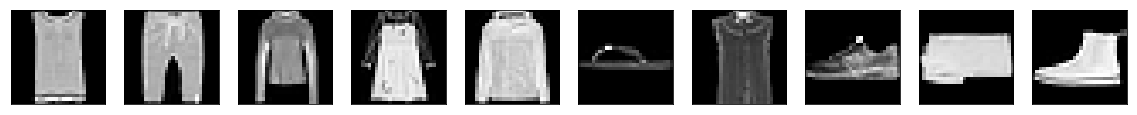

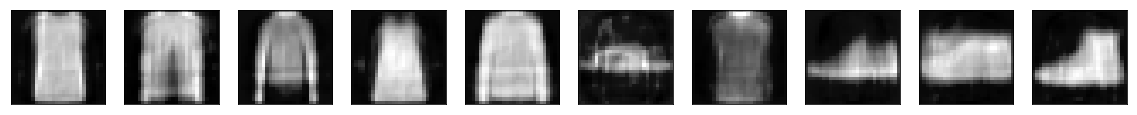

In [17]:
bastien_utils.plot_all_images(x_small)
bastien_utils.plot_all_images(autoencoder.predict(x_small))

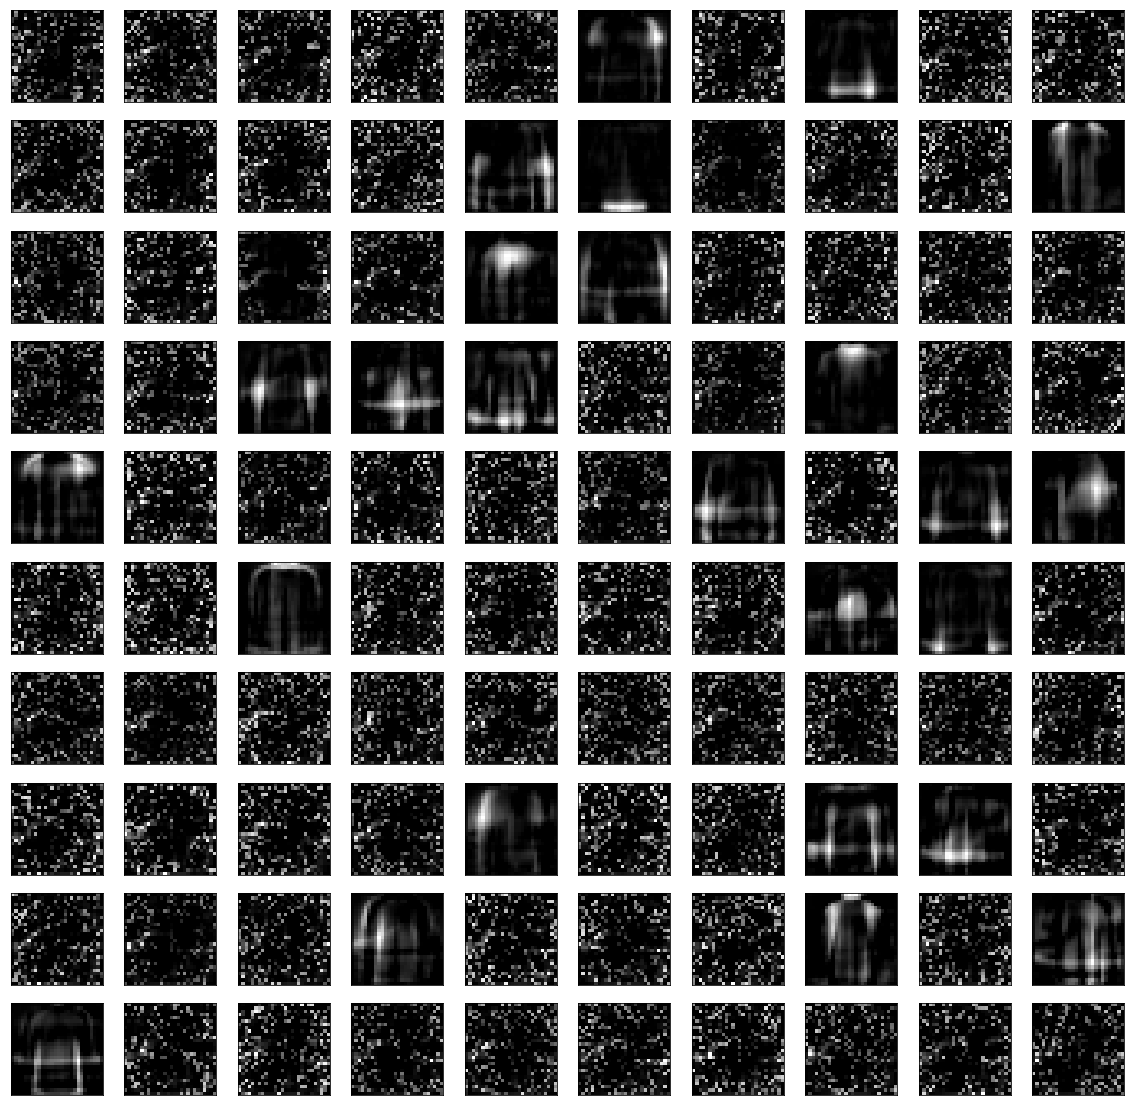

In [18]:
bastien_utils.plot_all_images(decoder.get_weights()[0].reshape((100,28,28,1)))

# 4. RELU instead of lReLU

In [21]:
input_img = Input(shape=(nb_rows, nb_columns,nb_input_channels))  # adapt this if using `channels_first` image data format
x = Flatten()(input_img)
encoded = Dense(latent_dim, activation='sigmoid', 
                activity_regularizer=custom_regularizers.sparseness(beta=0.01))(x)
encoder = Model(input_img, encoded, name='encoder')
encoded_img = Input(shape=(latent_dim,))  
x = Dense(nb_rows*nb_columns*nb_output_channels, kernel_constraint=constraints.non_neg())(encoded_img)
x = ReLU()(x)
decoded = Reshape((nb_rows,nb_columns,nb_output_channels))(x)
decoder = Model(encoded_img, decoded, name='decoder')
encoded = encoder(input_img)
decoded = decoder(encoded)
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='mean_squared_error', metrics=['mse'])


In [22]:
autoencoder.fit(x_train, x_train, epochs=400, batch_size=128, shuffle=True, validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/400
60000/60000 [==============================] - 7s 108us/step - loss: 0.1067 - mean_squared_error: 0.1009 - val_loss: 0.0757 - val_mean_squared_error: 0.0711
Epoch 2/400
60000/60000 [==============================] - 6s 97us/step - loss: 0.0679 - mean_squared_error: 0.0635 - val_loss: 0.0618 - val_mean_squared_error: 0.0576
Epoch 3/400
60000/60000 [==============================] - 5s 86us/step - loss: 0.0589 - mean_squared_error: 0.0548 - val_loss: 0.0557 - val_mean_squared_error: 0.0518
Epoch 4/400
60000/60000 [==============================] - 5s 84us/step - loss: 0.0537 - mean_squared_error: 0.0498 - val_loss: 0.0514 - val_mean_squared_error: 0.0476
Epoch 5/400
60000/60000 [==============================] - 5s 85us/step - loss: 0.0498 - mean_squared_error: 0.0460 - val_loss: 0.0479 - val_mean_squared_error: 0.0441
Epoch 6/400
60000/60000 [==============================] - 5s 83us/step - loss: 0.0465 - mean_squared_error: 

60000/60000 [==============================] - 5s 82us/step - loss: 0.0229 - mean_squared_error: 0.0199 - val_loss: 0.0229 - val_mean_squared_error: 0.0199
Epoch 98/400
60000/60000 [==============================] - 5s 82us/step - loss: 0.0229 - mean_squared_error: 0.0199 - val_loss: 0.0229 - val_mean_squared_error: 0.0199
Epoch 99/400
60000/60000 [==============================] - 5s 83us/step - loss: 0.0229 - mean_squared_error: 0.0199 - val_loss: 0.0229 - val_mean_squared_error: 0.0199
Epoch 100/400
60000/60000 [==============================] - 5s 86us/step - loss: 0.0229 - mean_squared_error: 0.0199 - val_loss: 0.0229 - val_mean_squared_error: 0.0198
Epoch 101/400
60000/60000 [==============================] - 5s 85us/step - loss: 0.0229 - mean_squared_error: 0.0198 - val_loss: 0.0229 - val_mean_squared_error: 0.0198
Epoch 102/400
60000/60000 [==============================] - 5s 85us/step - loss: 0.0228 - mean_squared_error: 0.0198 - val_loss: 0.0228 - val_mean_squared_error: 0.0

60000/60000 [==============================] - 5s 83us/step - loss: 0.0218 - mean_squared_error: 0.0187 - val_loss: 0.0218 - val_mean_squared_error: 0.0187
Epoch 194/400
60000/60000 [==============================] - 5s 87us/step - loss: 0.0218 - mean_squared_error: 0.0187 - val_loss: 0.0218 - val_mean_squared_error: 0.0187
Epoch 195/400
60000/60000 [==============================] - 5s 83us/step - loss: 0.0218 - mean_squared_error: 0.0187 - val_loss: 0.0218 - val_mean_squared_error: 0.0187
Epoch 196/400
60000/60000 [==============================] - 5s 84us/step - loss: 0.0218 - mean_squared_error: 0.0187 - val_loss: 0.0218 - val_mean_squared_error: 0.0187
Epoch 197/400
60000/60000 [==============================] - 5s 83us/step - loss: 0.0218 - mean_squared_error: 0.0187 - val_loss: 0.0218 - val_mean_squared_error: 0.0187
Epoch 198/400
60000/60000 [==============================] - 5s 84us/step - loss: 0.0218 - mean_squared_error: 0.0187 - val_loss: 0.0218 - val_mean_squared_error: 0

60000/60000 [==============================] - 6s 96us/step - loss: 0.0215 - mean_squared_error: 0.0184 - val_loss: 0.0215 - val_mean_squared_error: 0.0184
Epoch 242/400
60000/60000 [==============================] - 6s 94us/step - loss: 0.0215 - mean_squared_error: 0.0184 - val_loss: 0.0215 - val_mean_squared_error: 0.0184
Epoch 243/400
60000/60000 [==============================] - 6s 95us/step - loss: 0.0215 - mean_squared_error: 0.0184 - val_loss: 0.0215 - val_mean_squared_error: 0.0184
Epoch 244/400
60000/60000 [==============================] - 6s 95us/step - loss: 0.0215 - mean_squared_error: 0.0184 - val_loss: 0.0215 - val_mean_squared_error: 0.0184
Epoch 245/400
60000/60000 [==============================] - 6s 95us/step - loss: 0.0215 - mean_squared_error: 0.0184 - val_loss: 0.0215 - val_mean_squared_error: 0.0184
Epoch 246/400
60000/60000 [==============================] - 6s 95us/step - loss: 0.0215 - mean_squared_error: 0.0184 - val_loss: 0.0215 - val_mean_squared_error: 0

60000/60000 [==============================] - 5s 90us/step - loss: 0.0210 - mean_squared_error: 0.0179 - val_loss: 0.0211 - val_mean_squared_error: 0.0179
Epoch 338/400
60000/60000 [==============================] - 5s 88us/step - loss: 0.0210 - mean_squared_error: 0.0179 - val_loss: 0.0211 - val_mean_squared_error: 0.0179
Epoch 339/400
60000/60000 [==============================] - 5s 85us/step - loss: 0.0210 - mean_squared_error: 0.0179 - val_loss: 0.0211 - val_mean_squared_error: 0.0179
Epoch 340/400
60000/60000 [==============================] - 5s 83us/step - loss: 0.0210 - mean_squared_error: 0.0179 - val_loss: 0.0211 - val_mean_squared_error: 0.0179
Epoch 341/400
60000/60000 [==============================] - 5s 83us/step - loss: 0.0210 - mean_squared_error: 0.0179 - val_loss: 0.0211 - val_mean_squared_error: 0.0179
Epoch 342/400
60000/60000 [==============================] - 5s 83us/step - loss: 0.0210 - mean_squared_error: 0.0179 - val_loss: 0.0211 - val_mean_squared_error: 0

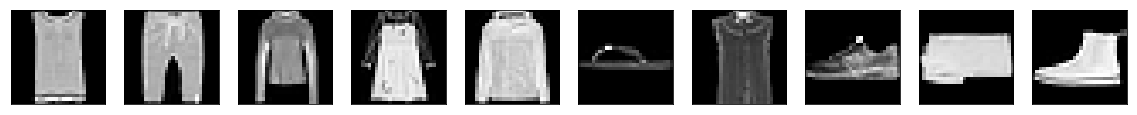

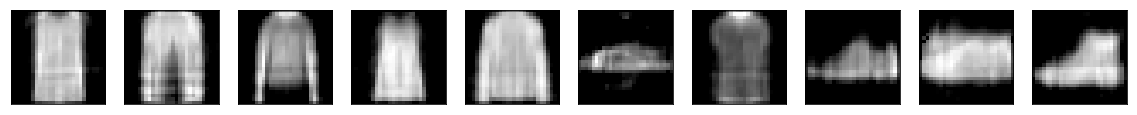

In [23]:
bastien_utils.plot_all_images(x_small)
bastien_utils.plot_all_images(autoencoder.predict(x_small))

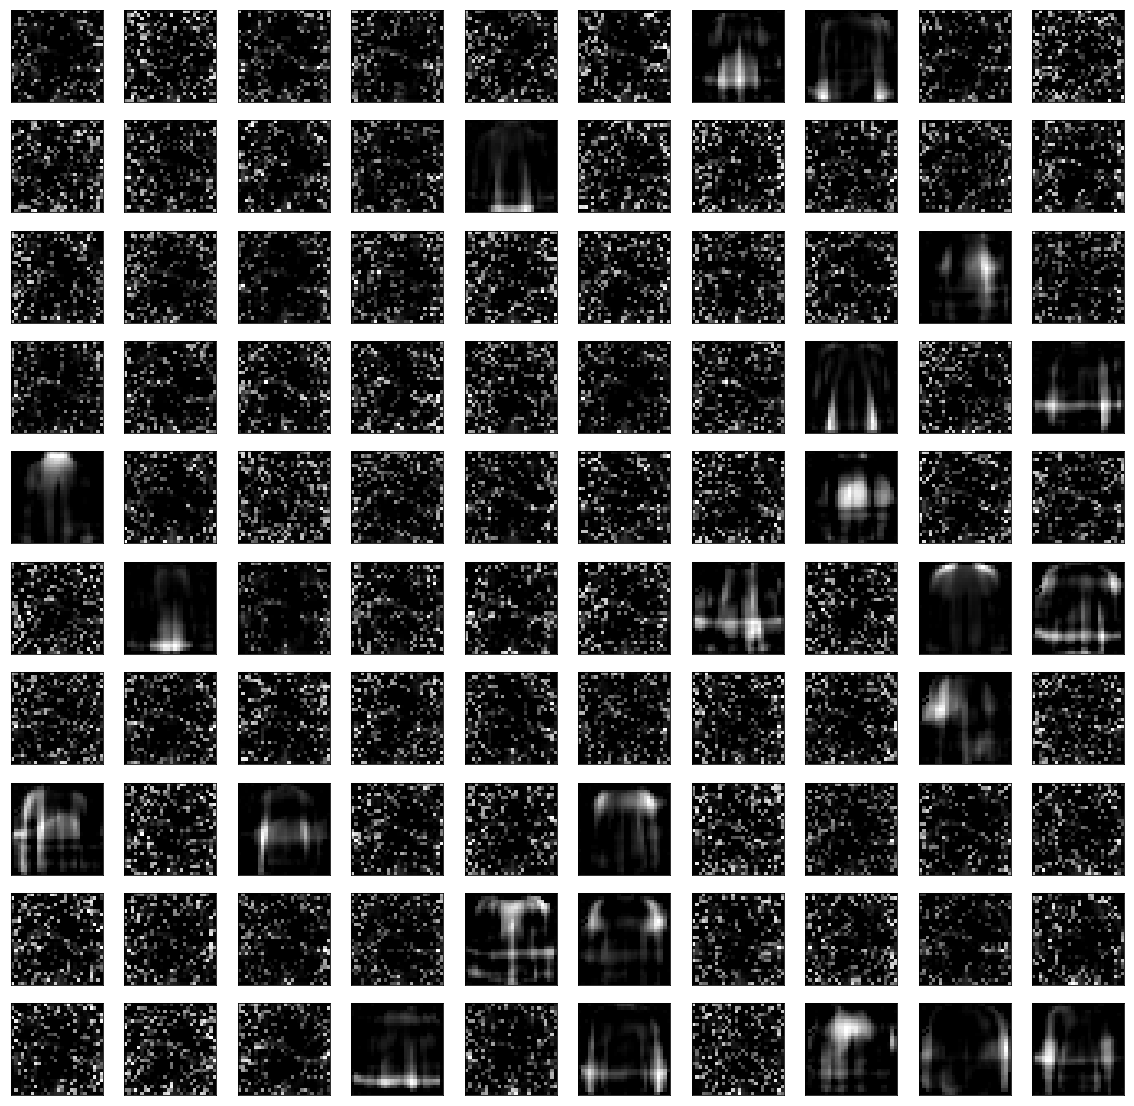

In [24]:
bastien_utils.plot_all_images(decoder.get_weights()[0].reshape((100,28,28,1)))

# 5

In [25]:
input_img = Input(shape=(nb_rows, nb_columns,nb_input_channels))  # adapt this if using `channels_first` image data format
x = Flatten()(input_img)
encoded = Dense(latent_dim, activation='sigmoid')(x)
encoder = Model(input_img, encoded, name='encoder')
encoded_img = Input(shape=(latent_dim,))  
x = Dense(nb_rows*nb_columns*nb_output_channels, kernel_constraint=constraints.non_neg())(encoded_img)
x = LeakyReLU(alpha=0.1)(x)
decoded = Reshape((nb_rows,nb_columns,nb_output_channels))(x)
decoder = Model(encoded_img, decoded, name='decoder')
encoded = encoder(input_img)
decoded = decoder(encoded)
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='mean_squared_error', metrics=['mse'])


In [26]:
autoencoder.fit(x_train, x_train, epochs=400, batch_size=128, shuffle=True, validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/400
60000/60000 [==============================] - 7s 113us/step - loss: 0.0997 - mean_squared_error: 0.0997 - val_loss: 0.0701 - val_mean_squared_error: 0.0701
Epoch 2/400
60000/60000 [==============================] - 6s 97us/step - loss: 0.0629 - mean_squared_error: 0.0629 - val_loss: 0.0572 - val_mean_squared_error: 0.0572
Epoch 3/400
60000/60000 [==============================] - 6s 97us/step - loss: 0.0546 - mean_squared_error: 0.0546 - val_loss: 0.0516 - val_mean_squared_error: 0.0516
Epoch 4/400
60000/60000 [==============================] - 5s 88us/step - loss: 0.0497 - mean_squared_error: 0.0497 - val_loss: 0.0474 - val_mean_squared_error: 0.0474
Epoch 5/400
60000/60000 [==============================] - 6s 96us/step - loss: 0.0458 - mean_squared_error: 0.0458 - val_loss: 0.0439 - val_mean_squared_error: 0.0439
Epoch 6/400
60000/60000 [==============================] - 6s 97us/step - loss: 0.0425 - mean_squared_error: 

60000/60000 [==============================] - 5s 85us/step - loss: 0.0185 - mean_squared_error: 0.0185 - val_loss: 0.0185 - val_mean_squared_error: 0.0185
Epoch 98/400
60000/60000 [==============================] - 5s 84us/step - loss: 0.0185 - mean_squared_error: 0.0185 - val_loss: 0.0184 - val_mean_squared_error: 0.0184
Epoch 99/400
60000/60000 [==============================] - 5s 84us/step - loss: 0.0184 - mean_squared_error: 0.0184 - val_loss: 0.0184 - val_mean_squared_error: 0.0184
Epoch 100/400
60000/60000 [==============================] - 5s 84us/step - loss: 0.0184 - mean_squared_error: 0.0184 - val_loss: 0.0184 - val_mean_squared_error: 0.0184
Epoch 101/400
60000/60000 [==============================] - 5s 85us/step - loss: 0.0184 - mean_squared_error: 0.0184 - val_loss: 0.0183 - val_mean_squared_error: 0.0183
Epoch 102/400
60000/60000 [==============================] - 5s 85us/step - loss: 0.0183 - mean_squared_error: 0.0183 - val_loss: 0.0183 - val_mean_squared_error: 0.0

60000/60000 [==============================] - 6s 97us/step - loss: 0.0169 - mean_squared_error: 0.0169 - val_loss: 0.0169 - val_mean_squared_error: 0.0169
Epoch 194/400
60000/60000 [==============================] - 6s 98us/step - loss: 0.0169 - mean_squared_error: 0.0169 - val_loss: 0.0169 - val_mean_squared_error: 0.0169
Epoch 195/400
60000/60000 [==============================] - 6s 99us/step - loss: 0.0169 - mean_squared_error: 0.0169 - val_loss: 0.0169 - val_mean_squared_error: 0.0169
Epoch 196/400
60000/60000 [==============================] - 6s 99us/step - loss: 0.0169 - mean_squared_error: 0.0169 - val_loss: 0.0169 - val_mean_squared_error: 0.0169
Epoch 197/400
60000/60000 [==============================] - 6s 100us/step - loss: 0.0169 - mean_squared_error: 0.0169 - val_loss: 0.0169 - val_mean_squared_error: 0.0169
Epoch 198/400
60000/60000 [==============================] - 6s 99us/step - loss: 0.0168 - mean_squared_error: 0.0168 - val_loss: 0.0168 - val_mean_squared_error: 

60000/60000 [==============================] - 6s 94us/step - loss: 0.0161 - mean_squared_error: 0.0161 - val_loss: 0.0161 - val_mean_squared_error: 0.0161
Epoch 290/400
60000/60000 [==============================] - 6s 96us/step - loss: 0.0161 - mean_squared_error: 0.0161 - val_loss: 0.0161 - val_mean_squared_error: 0.0161
Epoch 291/400
60000/60000 [==============================] - 6s 97us/step - loss: 0.0161 - mean_squared_error: 0.0161 - val_loss: 0.0161 - val_mean_squared_error: 0.0161
Epoch 292/400
60000/60000 [==============================] - 6s 97us/step - loss: 0.0160 - mean_squared_error: 0.0160 - val_loss: 0.0161 - val_mean_squared_error: 0.0161
Epoch 293/400
60000/60000 [==============================] - 6s 97us/step - loss: 0.0160 - mean_squared_error: 0.0160 - val_loss: 0.0161 - val_mean_squared_error: 0.0161
Epoch 294/400
60000/60000 [==============================] - 6s 95us/step - loss: 0.0160 - mean_squared_error: 0.0160 - val_loss: 0.0160 - val_mean_squared_error: 0

60000/60000 [==============================] - 6s 96us/step - loss: 0.0157 - mean_squared_error: 0.0157 - val_loss: 0.0158 - val_mean_squared_error: 0.0158
Epoch 338/400
60000/60000 [==============================] - 6s 97us/step - loss: 0.0157 - mean_squared_error: 0.0157 - val_loss: 0.0158 - val_mean_squared_error: 0.0158
Epoch 339/400
60000/60000 [==============================] - 6s 96us/step - loss: 0.0157 - mean_squared_error: 0.0157 - val_loss: 0.0158 - val_mean_squared_error: 0.0158
Epoch 340/400
60000/60000 [==============================] - 6s 97us/step - loss: 0.0157 - mean_squared_error: 0.0157 - val_loss: 0.0158 - val_mean_squared_error: 0.0158
Epoch 341/400
60000/60000 [==============================] - 6s 97us/step - loss: 0.0157 - mean_squared_error: 0.0157 - val_loss: 0.0157 - val_mean_squared_error: 0.0157
Epoch 342/400
60000/60000 [==============================] - 6s 98us/step - loss: 0.0157 - mean_squared_error: 0.0157 - val_loss: 0.0157 - val_mean_squared_error: 0

60000/60000 [==============================] - 6s 102us/step - loss: 0.0154 - mean_squared_error: 0.0154 - val_loss: 0.0155 - val_mean_squared_error: 0.0155
Epoch 386/400
60000/60000 [==============================] - 6s 104us/step - loss: 0.0154 - mean_squared_error: 0.0154 - val_loss: 0.0155 - val_mean_squared_error: 0.0155
Epoch 387/400
60000/60000 [==============================] - 6s 105us/step - loss: 0.0154 - mean_squared_error: 0.0154 - val_loss: 0.0154 - val_mean_squared_error: 0.0154
Epoch 388/400
60000/60000 [==============================] - 6s 101us/step - loss: 0.0154 - mean_squared_error: 0.0154 - val_loss: 0.0154 - val_mean_squared_error: 0.0154
Epoch 389/400
60000/60000 [==============================] - 6s 104us/step - loss: 0.0154 - mean_squared_error: 0.0154 - val_loss: 0.0154 - val_mean_squared_error: 0.0154
Epoch 390/400
60000/60000 [==============================] - 6s 102us/step - loss: 0.0154 - mean_squared_error: 0.0154 - val_loss: 0.0154 - val_mean_squared_er

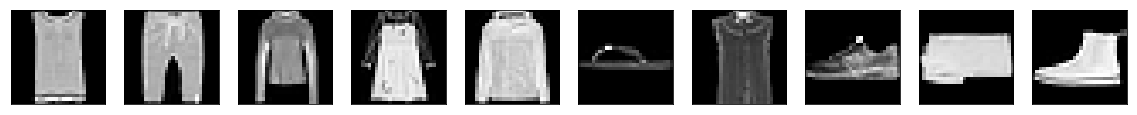

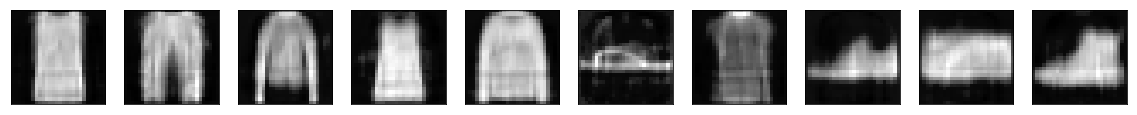

In [27]:
bastien_utils.plot_all_images(x_small)
bastien_utils.plot_all_images(autoencoder.predict(x_small))

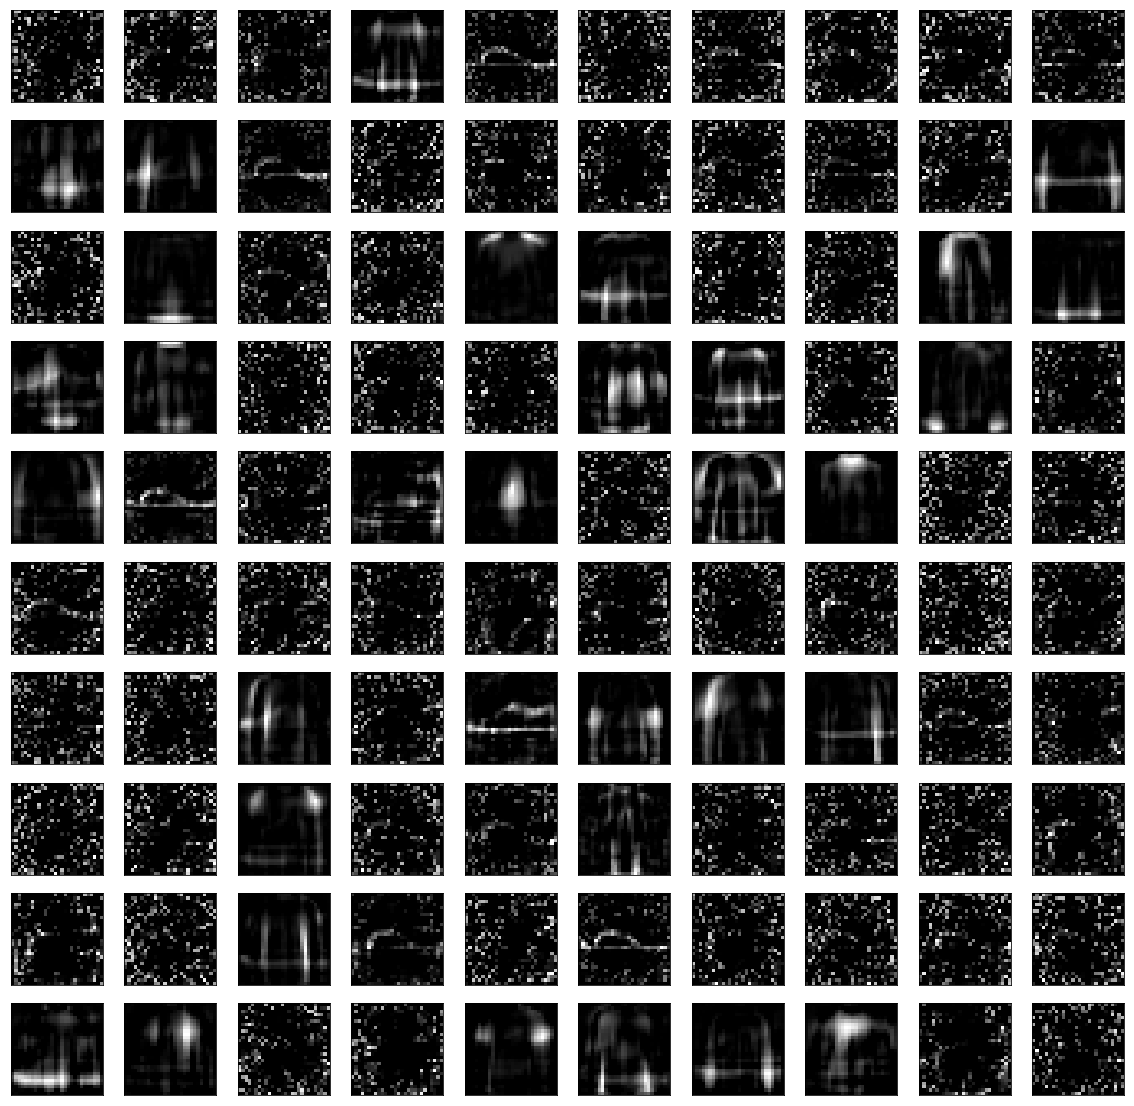

In [28]:
bastien_utils.plot_all_images(decoder.get_weights()[0].reshape((100,28,28,1)))

# 6

In [29]:
input_img = Input(shape=(nb_rows, nb_columns,nb_input_channels))  # adapt this if using `channels_first` image data format
x = Flatten()(input_img)
encoded = Dense(latent_dim, activation='sigmoid', 
                activity_regularizer=custom_regularizers.sparseness(beta=0.001))(x)
encoder = Model(input_img, encoded, name='encoder')
encoded_img = Input(shape=(latent_dim,))  
x = Dense(nb_rows*nb_columns*nb_output_channels, kernel_constraint=constraints.non_neg())(encoded_img)
x = LeakyReLU(alpha=0.1)(x)
decoded = Reshape((nb_rows,nb_columns,nb_output_channels))(x)
decoder = Model(encoded_img, decoded, name='decoder')
encoded = encoder(input_img)
decoded = decoder(encoded)
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='mean_squared_error', metrics=['mse'])


In [30]:
autoencoder.fit(x_train, x_train, epochs=400, batch_size=128, shuffle=True, validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/400
60000/60000 [==============================] - 8s 132us/step - loss: 0.1003 - mean_squared_error: 0.0997 - val_loss: 0.0703 - val_mean_squared_error: 0.0698
Epoch 2/400
60000/60000 [==============================] - 5s 91us/step - loss: 0.0633 - mean_squared_error: 0.0628 - val_loss: 0.0579 - val_mean_squared_error: 0.0574
Epoch 3/400
60000/60000 [==============================] - 5s 89us/step - loss: 0.0552 - mean_squared_error: 0.0547 - val_loss: 0.0521 - val_mean_squared_error: 0.0516
Epoch 4/400
60000/60000 [==============================] - 5s 89us/step - loss: 0.0500 - mean_squared_error: 0.0495 - val_loss: 0.0475 - val_mean_squared_error: 0.0471
Epoch 5/400
60000/60000 [==============================] - 5s 88us/step - loss: 0.0459 - mean_squared_error: 0.0455 - val_loss: 0.0439 - val_mean_squared_error: 0.0435
Epoch 6/400
60000/60000 [==============================] - 5s 91us/step - loss: 0.0426 - mean_squared_error: 

60000/60000 [==============================] - 6s 99us/step - loss: 0.0208 - mean_squared_error: 0.0204 - val_loss: 0.0208 - val_mean_squared_error: 0.0204
Epoch 50/400
60000/60000 [==============================] - 6s 99us/step - loss: 0.0207 - mean_squared_error: 0.0204 - val_loss: 0.0207 - val_mean_squared_error: 0.0203
Epoch 51/400
60000/60000 [==============================] - 6s 99us/step - loss: 0.0207 - mean_squared_error: 0.0203 - val_loss: 0.0206 - val_mean_squared_error: 0.0202
Epoch 52/400
60000/60000 [==============================] - 6s 99us/step - loss: 0.0206 - mean_squared_error: 0.0202 - val_loss: 0.0205 - val_mean_squared_error: 0.0201
Epoch 53/400
60000/60000 [==============================] - 6s 100us/step - loss: 0.0205 - mean_squared_error: 0.0201 - val_loss: 0.0205 - val_mean_squared_error: 0.0201
Epoch 54/400
60000/60000 [==============================] - 6s 101us/step - loss: 0.0204 - mean_squared_error: 0.0200 - val_loss: 0.0204 - val_mean_squared_error: 0.02

60000/60000 [==============================] - 5s 86us/step - loss: 0.0175 - mean_squared_error: 0.0171 - val_loss: 0.0175 - val_mean_squared_error: 0.0171
Epoch 146/400
60000/60000 [==============================] - 5s 86us/step - loss: 0.0175 - mean_squared_error: 0.0171 - val_loss: 0.0175 - val_mean_squared_error: 0.0171
Epoch 147/400
60000/60000 [==============================] - 5s 86us/step - loss: 0.0175 - mean_squared_error: 0.0171 - val_loss: 0.0175 - val_mean_squared_error: 0.0171
Epoch 148/400
60000/60000 [==============================] - 5s 87us/step - loss: 0.0175 - mean_squared_error: 0.0171 - val_loss: 0.0175 - val_mean_squared_error: 0.0171
Epoch 149/400
60000/60000 [==============================] - 5s 89us/step - loss: 0.0175 - mean_squared_error: 0.0171 - val_loss: 0.0175 - val_mean_squared_error: 0.0171
Epoch 150/400
60000/60000 [==============================] - 5s 89us/step - loss: 0.0175 - mean_squared_error: 0.0171 - val_loss: 0.0175 - val_mean_squared_error: 0

60000/60000 [==============================] - 5s 86us/step - loss: 0.0167 - mean_squared_error: 0.0163 - val_loss: 0.0167 - val_mean_squared_error: 0.0163
Epoch 242/400
60000/60000 [==============================] - 5s 86us/step - loss: 0.0167 - mean_squared_error: 0.0163 - val_loss: 0.0167 - val_mean_squared_error: 0.0163
Epoch 243/400
60000/60000 [==============================] - 5s 86us/step - loss: 0.0167 - mean_squared_error: 0.0163 - val_loss: 0.0167 - val_mean_squared_error: 0.0163
Epoch 244/400
60000/60000 [==============================] - 5s 86us/step - loss: 0.0167 - mean_squared_error: 0.0163 - val_loss: 0.0167 - val_mean_squared_error: 0.0163
Epoch 245/400
60000/60000 [==============================] - 5s 86us/step - loss: 0.0167 - mean_squared_error: 0.0163 - val_loss: 0.0167 - val_mean_squared_error: 0.0163
Epoch 246/400
60000/60000 [==============================] - 5s 87us/step - loss: 0.0167 - mean_squared_error: 0.0163 - val_loss: 0.0167 - val_mean_squared_error: 0

60000/60000 [==============================] - 5s 90us/step - loss: 0.0163 - mean_squared_error: 0.0159 - val_loss: 0.0163 - val_mean_squared_error: 0.0159
Epoch 338/400
60000/60000 [==============================] - 5s 86us/step - loss: 0.0163 - mean_squared_error: 0.0159 - val_loss: 0.0163 - val_mean_squared_error: 0.0159
Epoch 339/400
60000/60000 [==============================] - 5s 87us/step - loss: 0.0163 - mean_squared_error: 0.0159 - val_loss: 0.0163 - val_mean_squared_error: 0.0159
Epoch 340/400
60000/60000 [==============================] - 5s 87us/step - loss: 0.0163 - mean_squared_error: 0.0159 - val_loss: 0.0163 - val_mean_squared_error: 0.0159
Epoch 341/400
60000/60000 [==============================] - 5s 86us/step - loss: 0.0163 - mean_squared_error: 0.0159 - val_loss: 0.0163 - val_mean_squared_error: 0.0159
Epoch 342/400
60000/60000 [==============================] - 5s 86us/step - loss: 0.0163 - mean_squared_error: 0.0158 - val_loss: 0.0163 - val_mean_squared_error: 0

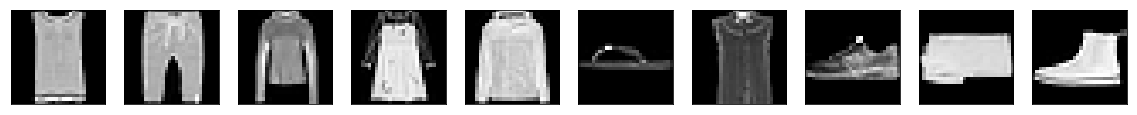

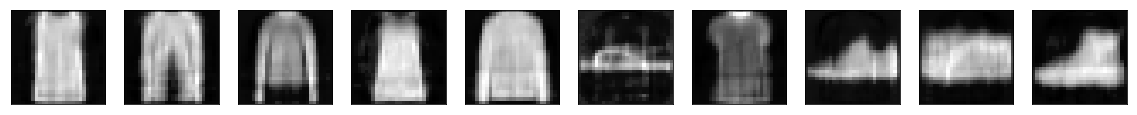

In [31]:
bastien_utils.plot_all_images(x_small)
bastien_utils.plot_all_images(autoencoder.predict(x_small))

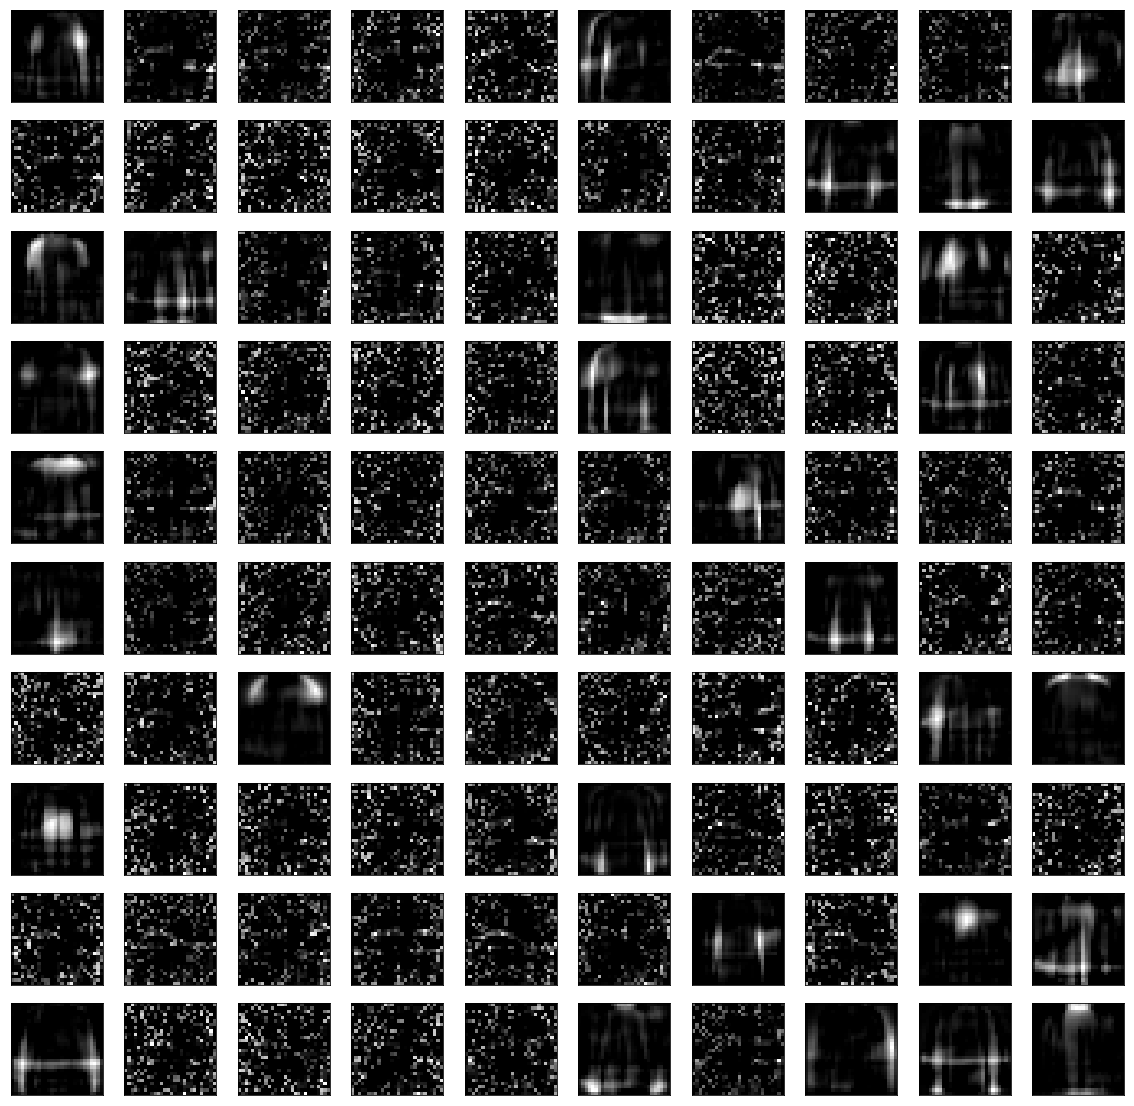

In [32]:
bastien_utils.plot_all_images(decoder.get_weights()[0].reshape((100,28,28,1)))

# 7

In [36]:
input_img = Input(shape=(nb_rows, nb_columns,nb_input_channels))  # adapt this if using `channels_first` image data format
x = Flatten()(input_img)
encoded = Dense(latent_dim, activation='sigmoid', 
                activity_regularizer=custom_regularizers.sparseness(beta=0.01))(x)
encoder = Model(input_img, encoded, name='encoder')
encoded_img = Input(shape=(latent_dim,))  
x = Dense(nb_rows*nb_columns*nb_output_channels, activation='sigmoid', kernel_constraint=constraints.non_neg())(encoded_img)
decoded = Reshape((nb_rows,nb_columns,nb_output_channels))(x)
decoder = Model(encoded_img, decoded, name='decoder')
encoded = encoder(input_img)
decoded = decoder(encoded)
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='mean_squared_error', metrics=['mse'])


In [37]:
autoencoder.fit(x_train, x_train, epochs=400, batch_size=128, shuffle=True, validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/400
60000/60000 [==============================] - 7s 114us/step - loss: 0.1901 - mean_squared_error: 0.1859 - val_loss: 0.1662 - val_mean_squared_error: 0.1643
Epoch 2/400
60000/60000 [==============================] - 6s 104us/step - loss: 0.1596 - mean_squared_error: 0.1581 - val_loss: 0.1523 - val_mean_squared_error: 0.1511
Epoch 3/400
60000/60000 [==============================] - 6s 105us/step - loss: 0.1481 - mean_squared_error: 0.1470 - val_loss: 0.1426 - val_mean_squared_error: 0.1416
Epoch 4/400
60000/60000 [==============================] - 6s 102us/step - loss: 0.1394 - mean_squared_error: 0.1385 - val_loss: 0.1349 - val_mean_squared_error: 0.1341
Epoch 5/400
60000/60000 [==============================] - 6s 104us/step - loss: 0.1324 - mean_squared_error: 0.1316 - val_loss: 0.1286 - val_mean_squared_error: 0.1279
Epoch 6/400
60000/60000 [==============================] - 6s 105us/step - loss: 0.1266 - mean_squared_er

Epoch 49/400
60000/60000 [==============================] - 6s 100us/step - loss: 0.0839 - mean_squared_error: 0.0832 - val_loss: 0.0833 - val_mean_squared_error: 0.0826
Epoch 50/400
60000/60000 [==============================] - 6s 99us/step - loss: 0.0836 - mean_squared_error: 0.0829 - val_loss: 0.0830 - val_mean_squared_error: 0.0823
Epoch 51/400
60000/60000 [==============================] - 6s 98us/step - loss: 0.0833 - mean_squared_error: 0.0826 - val_loss: 0.0827 - val_mean_squared_error: 0.0820
Epoch 52/400
60000/60000 [==============================] - 6s 99us/step - loss: 0.0830 - mean_squared_error: 0.0823 - val_loss: 0.0824 - val_mean_squared_error: 0.0817
Epoch 53/400
60000/60000 [==============================] - 6s 98us/step - loss: 0.0827 - mean_squared_error: 0.0820 - val_loss: 0.0821 - val_mean_squared_error: 0.0814
Epoch 54/400
60000/60000 [==============================] - 6s 107us/step - loss: 0.0824 - mean_squared_error: 0.0817 - val_loss: 0.0818 - val_mean_square

60000/60000 [==============================] - 6s 102us/step - loss: 0.0694 - mean_squared_error: 0.0693 - val_loss: 0.0689 - val_mean_squared_error: 0.0688
Epoch 146/400
60000/60000 [==============================] - 6s 97us/step - loss: 0.0693 - mean_squared_error: 0.0692 - val_loss: 0.0688 - val_mean_squared_error: 0.0687
Epoch 147/400
60000/60000 [==============================] - 6s 98us/step - loss: 0.0692 - mean_squared_error: 0.0690 - val_loss: 0.0687 - val_mean_squared_error: 0.0685
Epoch 148/400
60000/60000 [==============================] - 6s 98us/step - loss: 0.0691 - mean_squared_error: 0.0689 - val_loss: 0.0686 - val_mean_squared_error: 0.0684
Epoch 149/400
60000/60000 [==============================] - 6s 100us/step - loss: 0.0689 - mean_squared_error: 0.0688 - val_loss: 0.0685 - val_mean_squared_error: 0.0683
Epoch 150/400
60000/60000 [==============================] - 6s 106us/step - loss: 0.0688 - mean_squared_error: 0.0686 - val_loss: 0.0683 - val_mean_squared_error

60000/60000 [==============================] - 7s 110us/step - loss: 0.0582 - mean_squared_error: 0.0579 - val_loss: 0.0579 - val_mean_squared_error: 0.0575
Epoch 242/400
60000/60000 [==============================] - 6s 99us/step - loss: 0.0582 - mean_squared_error: 0.0578 - val_loss: 0.0578 - val_mean_squared_error: 0.0574
Epoch 243/400
60000/60000 [==============================] - 6s 97us/step - loss: 0.0581 - mean_squared_error: 0.0577 - val_loss: 0.0577 - val_mean_squared_error: 0.0574
Epoch 244/400
60000/60000 [==============================] - 6s 97us/step - loss: 0.0580 - mean_squared_error: 0.0577 - val_loss: 0.0577 - val_mean_squared_error: 0.0573
Epoch 245/400
60000/60000 [==============================] - 6s 97us/step - loss: 0.0580 - mean_squared_error: 0.0576 - val_loss: 0.0576 - val_mean_squared_error: 0.0572
Epoch 246/400
60000/60000 [==============================] - 6s 96us/step - loss: 0.0579 - mean_squared_error: 0.0575 - val_loss: 0.0575 - val_mean_squared_error: 

60000/60000 [==============================] - 6s 93us/step - loss: 0.0542 - mean_squared_error: 0.0539 - val_loss: 0.0539 - val_mean_squared_error: 0.0536
Epoch 338/400
60000/60000 [==============================] - 6s 93us/step - loss: 0.0542 - mean_squared_error: 0.0538 - val_loss: 0.0539 - val_mean_squared_error: 0.0535
Epoch 339/400
60000/60000 [==============================] - 6s 93us/step - loss: 0.0542 - mean_squared_error: 0.0538 - val_loss: 0.0539 - val_mean_squared_error: 0.0535
Epoch 340/400
60000/60000 [==============================] - 6s 94us/step - loss: 0.0541 - mean_squared_error: 0.0538 - val_loss: 0.0538 - val_mean_squared_error: 0.0535
Epoch 341/400
60000/60000 [==============================] - 6s 93us/step - loss: 0.0541 - mean_squared_error: 0.0538 - val_loss: 0.0538 - val_mean_squared_error: 0.0535
Epoch 342/400
60000/60000 [==============================] - 6s 94us/step - loss: 0.0541 - mean_squared_error: 0.0537 - val_loss: 0.0538 - val_mean_squared_error: 0

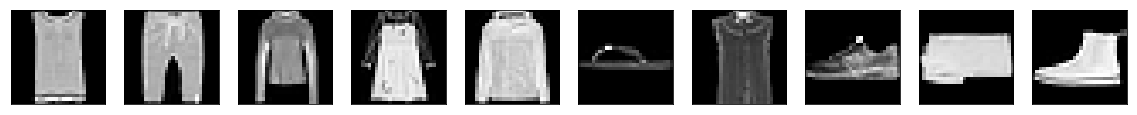

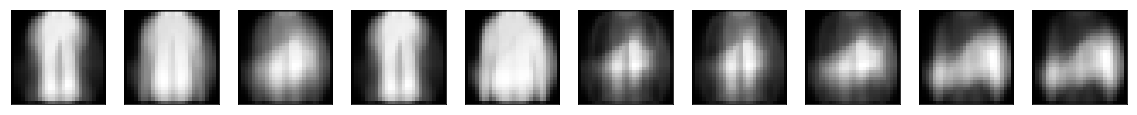

In [38]:
bastien_utils.plot_all_images(x_small)
bastien_utils.plot_all_images(autoencoder.predict(x_small))

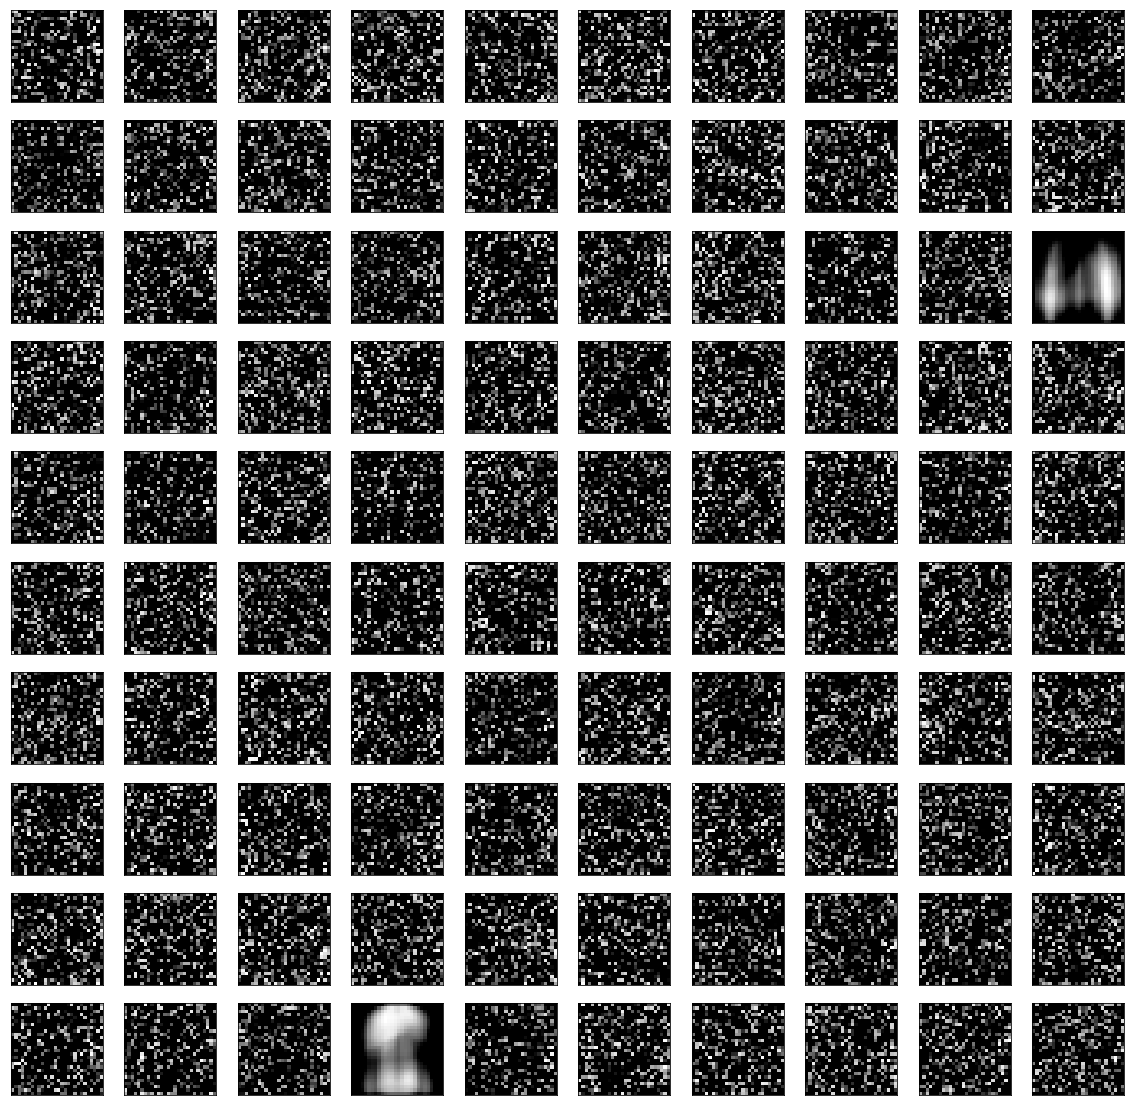

In [39]:
bastien_utils.plot_all_images(decoder.get_weights()[0].reshape((100,28,28,1)))

# 8 Constraint on both encoder and decoder

In [40]:
input_img = Input(shape=(nb_rows, nb_columns,nb_input_channels))  # adapt this if using `channels_first` image data format
x = Flatten()(input_img)
encoded = Dense(latent_dim, activation='sigmoid', 
                activity_regularizer=custom_regularizers.sparseness(beta=0.01), kernel_constraint=constraints.non_neg())(x)
encoder = Model(input_img, encoded, name='encoder')
encoded_img = Input(shape=(latent_dim,))  
x = Dense(nb_rows*nb_columns*nb_output_channels, kernel_constraint=constraints.non_neg())(encoded_img)
x = LeakyReLU(alpha=0.1)(x)
decoded = Reshape((nb_rows,nb_columns,nb_output_channels))(x)
decoder = Model(encoded_img, decoded, name='decoder')
encoded = encoder(input_img)
decoded = decoder(encoded)
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='mean_squared_error', metrics=['mse'])


In [41]:
autoencoder.fit(x_train, x_train, epochs=400, batch_size=128, shuffle=True, validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/400
60000/60000 [==============================] - 8s 137us/step - loss: 0.1789 - mean_squared_error: 0.1689 - val_loss: 0.0876 - val_mean_squared_error: 0.0776
Epoch 2/400
60000/60000 [==============================] - 7s 119us/step - loss: 0.0862 - mean_squared_error: 0.0762 - val_loss: 0.0840 - val_mean_squared_error: 0.0740
Epoch 3/400
60000/60000 [==============================] - 7s 121us/step - loss: 0.0817 - mean_squared_error: 0.0718 - val_loss: 0.0785 - val_mean_squared_error: 0.0686
Epoch 4/400
60000/60000 [==============================] - 8s 126us/step - loss: 0.0755 - mean_squared_error: 0.0656 - val_loss: 0.0721 - val_mean_squared_error: 0.0622
Epoch 5/400
60000/60000 [==============================] - 8s 130us/step - loss: 0.0696 - mean_squared_error: 0.0597 - val_loss: 0.0669 - val_mean_squared_error: 0.0571
Epoch 6/400
60000/60000 [==============================] - 7s 125us/step - loss: 0.0652 - mean_squared_er

Epoch 49/400
60000/60000 [==============================] - 6s 108us/step - loss: 0.0333 - mean_squared_error: 0.0240 - val_loss: 0.0332 - val_mean_squared_error: 0.0239
Epoch 50/400
60000/60000 [==============================] - 7s 110us/step - loss: 0.0332 - mean_squared_error: 0.0239 - val_loss: 0.0330 - val_mean_squared_error: 0.0238
Epoch 51/400
60000/60000 [==============================] - 6s 106us/step - loss: 0.0330 - mean_squared_error: 0.0237 - val_loss: 0.0329 - val_mean_squared_error: 0.0236
Epoch 52/400
60000/60000 [==============================] - 6s 107us/step - loss: 0.0329 - mean_squared_error: 0.0236 - val_loss: 0.0328 - val_mean_squared_error: 0.0235
Epoch 53/400
60000/60000 [==============================] - 6s 96us/step - loss: 0.0327 - mean_squared_error: 0.0235 - val_loss: 0.0326 - val_mean_squared_error: 0.0234
Epoch 54/400
60000/60000 [==============================] - 6s 103us/step - loss: 0.0326 - mean_squared_error: 0.0233 - val_loss: 0.0325 - val_mean_squ

60000/60000 [==============================] - 7s 109us/step - loss: 0.0275 - mean_squared_error: 0.0186 - val_loss: 0.0274 - val_mean_squared_error: 0.0186
Epoch 146/400
60000/60000 [==============================] - 7s 115us/step - loss: 0.0274 - mean_squared_error: 0.0186 - val_loss: 0.0274 - val_mean_squared_error: 0.0186
Epoch 147/400
60000/60000 [==============================] - 8s 127us/step - loss: 0.0274 - mean_squared_error: 0.0185 - val_loss: 0.0274 - val_mean_squared_error: 0.0185
Epoch 148/400
60000/60000 [==============================] - 8s 134us/step - loss: 0.0274 - mean_squared_error: 0.0185 - val_loss: 0.0274 - val_mean_squared_error: 0.0185
Epoch 149/400
60000/60000 [==============================] - 7s 118us/step - loss: 0.0274 - mean_squared_error: 0.0185 - val_loss: 0.0274 - val_mean_squared_error: 0.0185
Epoch 150/400
60000/60000 [==============================] - 7s 112us/step - loss: 0.0273 - mean_squared_error: 0.0185 - val_loss: 0.0273 - val_mean_squared_er

Epoch 193/400
60000/60000 [==============================] - 6s 108us/step - loss: 0.0267 - mean_squared_error: 0.0179 - val_loss: 0.0267 - val_mean_squared_error: 0.0179
Epoch 194/400
60000/60000 [==============================] - 6s 108us/step - loss: 0.0267 - mean_squared_error: 0.0179 - val_loss: 0.0267 - val_mean_squared_error: 0.0179
Epoch 195/400
60000/60000 [==============================] - 7s 110us/step - loss: 0.0266 - mean_squared_error: 0.0179 - val_loss: 0.0266 - val_mean_squared_error: 0.0179
Epoch 196/400
60000/60000 [==============================] - 7s 108us/step - loss: 0.0266 - mean_squared_error: 0.0179 - val_loss: 0.0266 - val_mean_squared_error: 0.0179
Epoch 197/400
60000/60000 [==============================] - 7s 109us/step - loss: 0.0266 - mean_squared_error: 0.0179 - val_loss: 0.0266 - val_mean_squared_error: 0.0179
Epoch 198/400
60000/60000 [==============================] - 7s 109us/step - loss: 0.0266 - mean_squared_error: 0.0179 - val_loss: 0.0266 - val_m

Epoch 241/400
60000/60000 [==============================] - 7s 109us/step - loss: 0.0262 - mean_squared_error: 0.0175 - val_loss: 0.0262 - val_mean_squared_error: 0.0175
Epoch 242/400
60000/60000 [==============================] - 7s 109us/step - loss: 0.0262 - mean_squared_error: 0.0175 - val_loss: 0.0262 - val_mean_squared_error: 0.0175
Epoch 243/400
60000/60000 [==============================] - 7s 108us/step - loss: 0.0262 - mean_squared_error: 0.0175 - val_loss: 0.0262 - val_mean_squared_error: 0.0175
Epoch 244/400
60000/60000 [==============================] - 6s 107us/step - loss: 0.0261 - mean_squared_error: 0.0175 - val_loss: 0.0262 - val_mean_squared_error: 0.0175
Epoch 245/400
60000/60000 [==============================] - 7s 109us/step - loss: 0.0261 - mean_squared_error: 0.0175 - val_loss: 0.0261 - val_mean_squared_error: 0.0175
Epoch 246/400
60000/60000 [==============================] - 7s 109us/step - loss: 0.0261 - mean_squared_error: 0.0174 - val_loss: 0.0261 - val_m

Epoch 289/400
60000/60000 [==============================] - 6s 92us/step - loss: 0.0258 - mean_squared_error: 0.0172 - val_loss: 0.0258 - val_mean_squared_error: 0.0172
Epoch 290/400
60000/60000 [==============================] - 5s 90us/step - loss: 0.0258 - mean_squared_error: 0.0172 - val_loss: 0.0258 - val_mean_squared_error: 0.0172
Epoch 291/400
60000/60000 [==============================] - 5s 91us/step - loss: 0.0258 - mean_squared_error: 0.0172 - val_loss: 0.0258 - val_mean_squared_error: 0.0172
Epoch 292/400
60000/60000 [==============================] - 5s 91us/step - loss: 0.0258 - mean_squared_error: 0.0172 - val_loss: 0.0258 - val_mean_squared_error: 0.0172
Epoch 293/400
60000/60000 [==============================] - 5s 91us/step - loss: 0.0258 - mean_squared_error: 0.0172 - val_loss: 0.0258 - val_mean_squared_error: 0.0172
Epoch 294/400
60000/60000 [==============================] - 5s 90us/step - loss: 0.0258 - mean_squared_error: 0.0172 - val_loss: 0.0258 - val_mean_sq

60000/60000 [==============================] - 6s 92us/step - loss: 0.0254 - mean_squared_error: 0.0168 - val_loss: 0.0254 - val_mean_squared_error: 0.0168
Epoch 386/400
60000/60000 [==============================] - 5s 91us/step - loss: 0.0254 - mean_squared_error: 0.0168 - val_loss: 0.0254 - val_mean_squared_error: 0.0168
Epoch 387/400
60000/60000 [==============================] - 5s 91us/step - loss: 0.0254 - mean_squared_error: 0.0168 - val_loss: 0.0254 - val_mean_squared_error: 0.0168
Epoch 388/400
60000/60000 [==============================] - 6s 92us/step - loss: 0.0254 - mean_squared_error: 0.0168 - val_loss: 0.0254 - val_mean_squared_error: 0.0168
Epoch 389/400
60000/60000 [==============================] - 6s 93us/step - loss: 0.0254 - mean_squared_error: 0.0168 - val_loss: 0.0254 - val_mean_squared_error: 0.0168
Epoch 390/400
60000/60000 [==============================] - 6s 92us/step - loss: 0.0254 - mean_squared_error: 0.0168 - val_loss: 0.0254 - val_mean_squared_error: 0

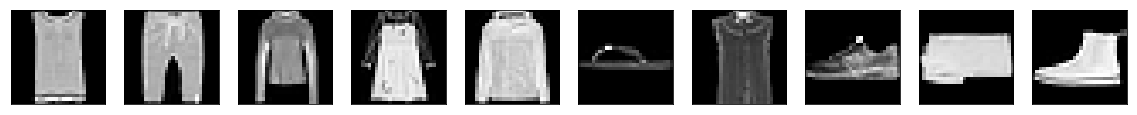

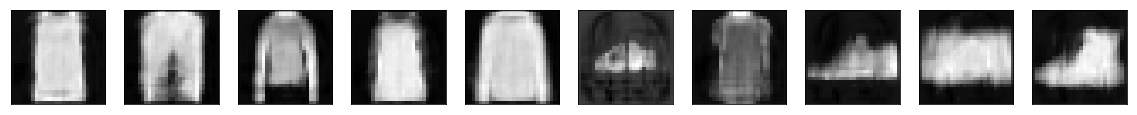

In [42]:
bastien_utils.plot_all_images(x_small)
bastien_utils.plot_all_images(autoencoder.predict(x_small))

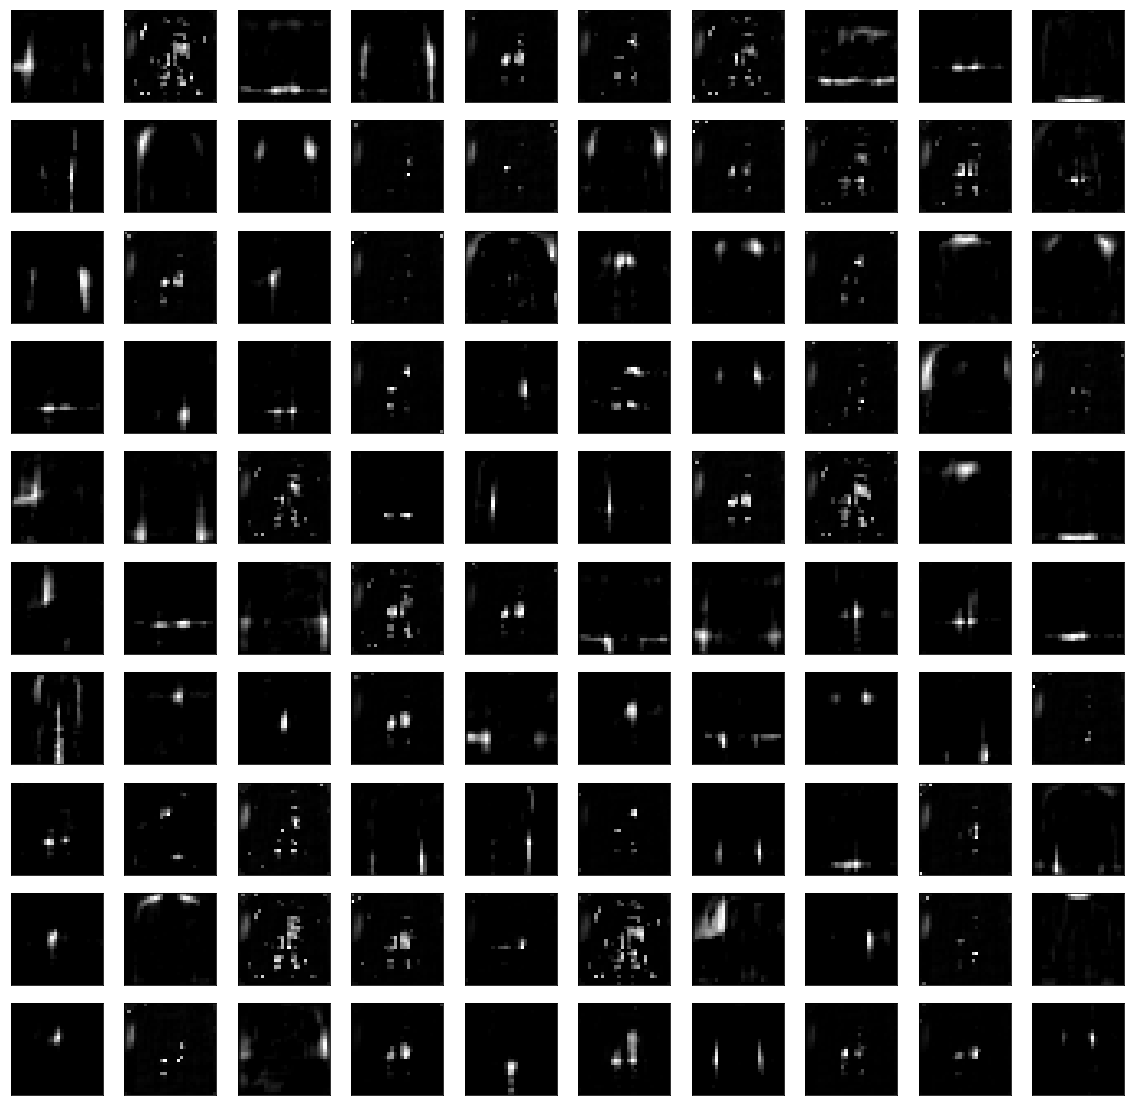

In [43]:
bastien_utils.plot_all_images(decoder.get_weights()[0].reshape((100,28,28,1)))

# 9 Non Neg Constraint on both encoder and decoder, KL div Sum

In [44]:
input_img = Input(shape=(nb_rows, nb_columns,nb_input_channels))  # adapt this if using `channels_first` image data format
x = Flatten()(input_img)
encoded = Dense(latent_dim, activation='sigmoid', 
                activity_regularizer=custom_regularizers.KL_divergence_sum(beta=0.01, rho=0.05), kernel_constraint=constraints.non_neg())(x)
encoder = Model(input_img, encoded, name='encoder')
encoded_img = Input(shape=(latent_dim,))  
x = Dense(nb_rows*nb_columns*nb_output_channels, kernel_constraint=constraints.non_neg())(encoded_img)
x = LeakyReLU(alpha=0.1)(x)
decoded = Reshape((nb_rows,nb_columns,nb_output_channels))(x)
decoder = Model(encoded_img, decoded, name='decoder')
encoded = encoder(input_img)
decoded = decoder(encoded)
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='mean_squared_error', metrics=['mse'])


In [46]:
autoencoder.fit(x_train, x_train, epochs=400, batch_size=128, shuffle=True, validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/400
60000/60000 [==============================] - 7s 113us/step - loss: 0.0386 - mean_squared_error: 0.0363 - val_loss: 0.0385 - val_mean_squared_error: 0.0362
Epoch 2/400
60000/60000 [==============================] - 7s 122us/step - loss: 0.0385 - mean_squared_error: 0.0363 - val_loss: 0.0384 - val_mean_squared_error: 0.0362
Epoch 3/400
60000/60000 [==============================] - 7s 109us/step - loss: 0.0384 - mean_squared_error: 0.0362 - val_loss: 0.0383 - val_mean_squared_error: 0.0361
Epoch 4/400
60000/60000 [==============================] - 7s 109us/step - loss: 0.0383 - mean_squared_error: 0.0361 - val_loss: 0.0382 - val_mean_squared_error: 0.0360
Epoch 5/400
60000/60000 [==============================] - 7s 109us/step - loss: 0.0382 - mean_squared_error: 0.0360 - val_loss: 0.0381 - val_mean_squared_error: 0.0358
Epoch 6/400
60000/60000 [==============================] - 6s 94us/step - loss: 0.0381 - mean_squared_err

60000/60000 [==============================] - 5s 88us/step - loss: 0.0346 - mean_squared_error: 0.0329 - val_loss: 0.0346 - val_mean_squared_error: 0.0327
Epoch 50/400
60000/60000 [==============================] - 5s 88us/step - loss: 0.0345 - mean_squared_error: 0.0328 - val_loss: 0.0344 - val_mean_squared_error: 0.0327
Epoch 51/400
60000/60000 [==============================] - 5s 88us/step - loss: 0.0344 - mean_squared_error: 0.0328 - val_loss: 0.0344 - val_mean_squared_error: 0.0326
Epoch 52/400
60000/60000 [==============================] - 5s 88us/step - loss: 0.0344 - mean_squared_error: 0.0327 - val_loss: 0.0344 - val_mean_squared_error: 0.0329
Epoch 53/400
60000/60000 [==============================] - 5s 88us/step - loss: 0.0343 - mean_squared_error: 0.0327 - val_loss: 0.0343 - val_mean_squared_error: 0.0325
Epoch 54/400
60000/60000 [==============================] - 6s 94us/step - loss: 0.0343 - mean_squared_error: 0.0326 - val_loss: 0.0342 - val_mean_squared_error: 0.0325

60000/60000 [==============================] - 5s 88us/step - loss: 0.0306 - mean_squared_error: 0.0295 - val_loss: 0.0306 - val_mean_squared_error: 0.0294
Epoch 146/400
60000/60000 [==============================] - 5s 88us/step - loss: 0.0306 - mean_squared_error: 0.0294 - val_loss: 0.0306 - val_mean_squared_error: 0.0293
Epoch 147/400
60000/60000 [==============================] - 5s 88us/step - loss: 0.0306 - mean_squared_error: 0.0294 - val_loss: 0.0307 - val_mean_squared_error: 0.0294
Epoch 148/400
60000/60000 [==============================] - 5s 87us/step - loss: 0.0305 - mean_squared_error: 0.0294 - val_loss: 0.0305 - val_mean_squared_error: 0.0294
Epoch 149/400
60000/60000 [==============================] - 5s 88us/step - loss: 0.0305 - mean_squared_error: 0.0294 - val_loss: 0.0305 - val_mean_squared_error: 0.0295
Epoch 150/400
60000/60000 [==============================] - 5s 88us/step - loss: 0.0305 - mean_squared_error: 0.0293 - val_loss: 0.0304 - val_mean_squared_error: 0

60000/60000 [==============================] - 5s 89us/step - loss: 0.0283 - mean_squared_error: 0.0274 - val_loss: 0.0282 - val_mean_squared_error: 0.0273
Epoch 242/400
60000/60000 [==============================] - 6s 92us/step - loss: 0.0283 - mean_squared_error: 0.0274 - val_loss: 0.0282 - val_mean_squared_error: 0.0273
Epoch 243/400
60000/60000 [==============================] - 6s 92us/step - loss: 0.0283 - mean_squared_error: 0.0273 - val_loss: 0.0282 - val_mean_squared_error: 0.0273
Epoch 244/400
60000/60000 [==============================] - 5s 90us/step - loss: 0.0283 - mean_squared_error: 0.0273 - val_loss: 0.0282 - val_mean_squared_error: 0.0273
Epoch 245/400
60000/60000 [==============================] - 5s 88us/step - loss: 0.0282 - mean_squared_error: 0.0273 - val_loss: 0.0283 - val_mean_squared_error: 0.0273
Epoch 246/400
60000/60000 [==============================] - 6s 92us/step - loss: 0.0282 - mean_squared_error: 0.0273 - val_loss: 0.0282 - val_mean_squared_error: 0

60000/60000 [==============================] - 5s 87us/step - loss: 0.0266 - mean_squared_error: 0.0258 - val_loss: 0.0266 - val_mean_squared_error: 0.0258
Epoch 338/400
60000/60000 [==============================] - 5s 87us/step - loss: 0.0266 - mean_squared_error: 0.0258 - val_loss: 0.0266 - val_mean_squared_error: 0.0257
Epoch 339/400
60000/60000 [==============================] - 5s 87us/step - loss: 0.0266 - mean_squared_error: 0.0258 - val_loss: 0.0265 - val_mean_squared_error: 0.0257
Epoch 340/400
60000/60000 [==============================] - 5s 86us/step - loss: 0.0266 - mean_squared_error: 0.0258 - val_loss: 0.0266 - val_mean_squared_error: 0.0257
Epoch 341/400
60000/60000 [==============================] - 5s 87us/step - loss: 0.0266 - mean_squared_error: 0.0258 - val_loss: 0.0265 - val_mean_squared_error: 0.0257
Epoch 342/400
60000/60000 [==============================] - 5s 90us/step - loss: 0.0266 - mean_squared_error: 0.0258 - val_loss: 0.0265 - val_mean_squared_error: 0

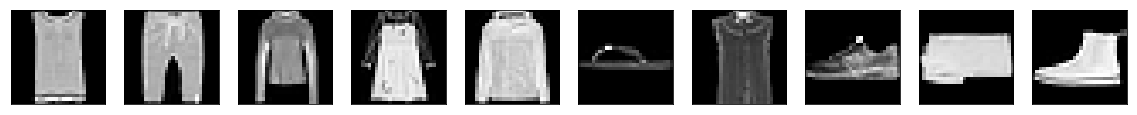

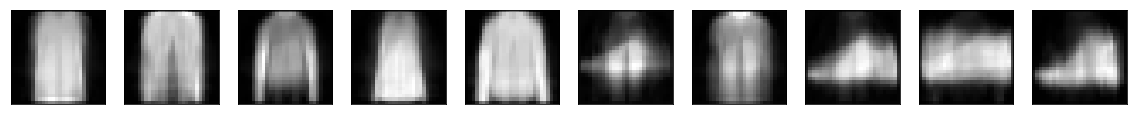

In [47]:
bastien_utils.plot_all_images(x_small)
bastien_utils.plot_all_images(autoencoder.predict(x_small))

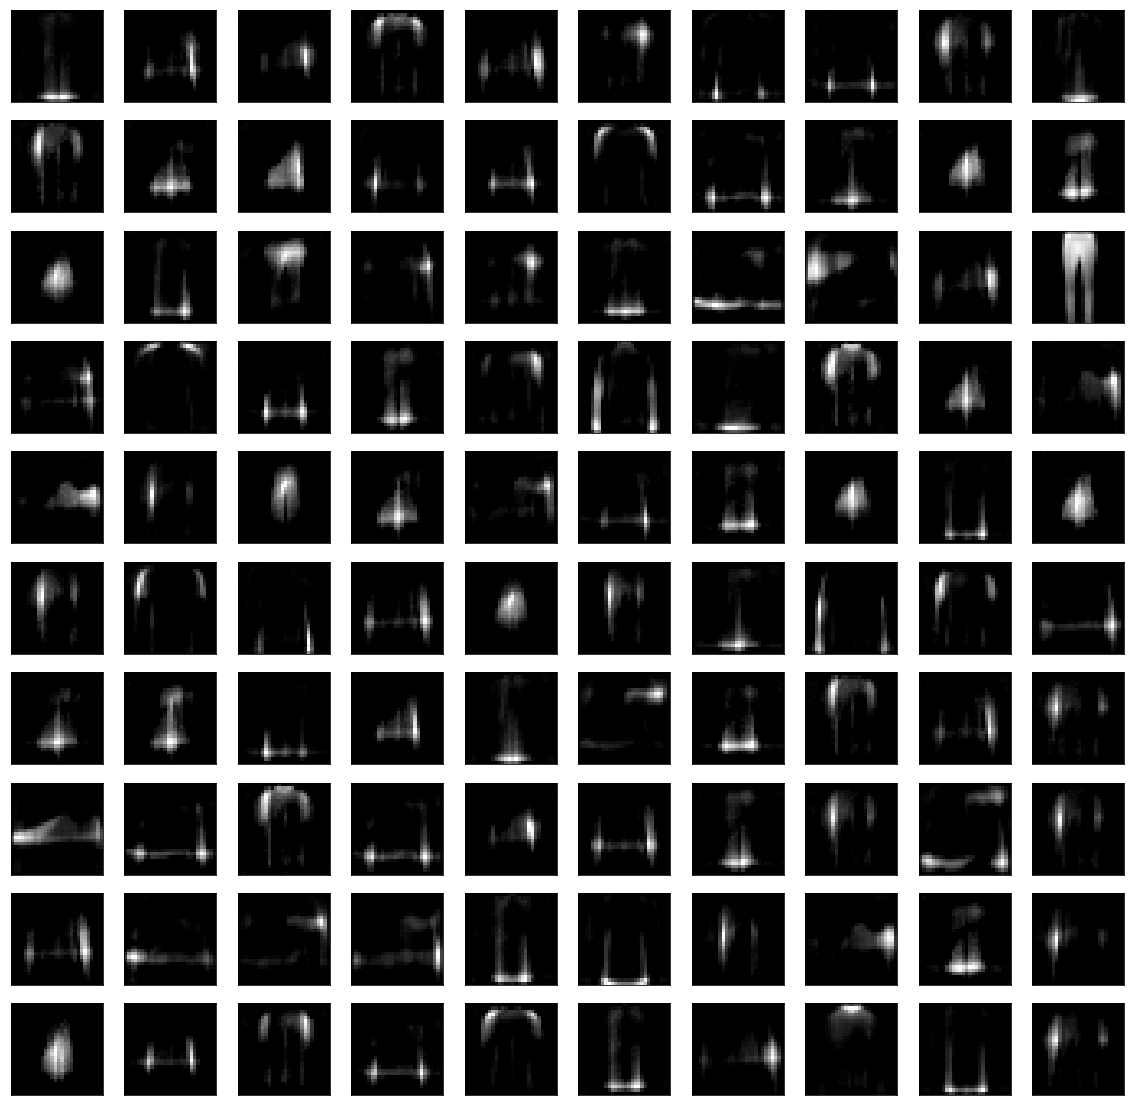

In [48]:
bastien_utils.plot_all_images(decoder.get_weights()[0].reshape((100,28,28,1)))

# 10. Non Neg COnstraint on the decoder only

In [49]:
input_img = Input(shape=(nb_rows, nb_columns,nb_input_channels))  # adapt this if using `channels_first` image data format
x = Flatten()(input_img)
encoded = Dense(latent_dim, activation='sigmoid', 
                activity_regularizer=custom_regularizers.KL_divergence_sum(beta=0.01, rho=0.05))(x)
encoder = Model(input_img, encoded, name='encoder')
encoded_img = Input(shape=(latent_dim,))  
x = Dense(nb_rows*nb_columns*nb_output_channels, kernel_constraint=constraints.non_neg())(encoded_img)
x = LeakyReLU(alpha=0.1)(x)
decoded = Reshape((nb_rows,nb_columns,nb_output_channels))(x)
decoder = Model(encoded_img, decoded, name='decoder')
encoded = encoder(input_img)
decoded = decoder(encoded)
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='mean_squared_error', metrics=['mse'])


In [50]:
autoencoder.fit(x_train, x_train, epochs=400, batch_size=128, shuffle=True, validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/400
60000/60000 [==============================] - 13s 212us/step - loss: 0.1640 - mean_squared_error: 0.1543 - val_loss: 0.1233 - val_mean_squared_error: 0.1227
Epoch 2/400
60000/60000 [==============================] - 7s 113us/step - loss: 0.1128 - mean_squared_error: 0.1122 - val_loss: 0.1050 - val_mean_squared_error: 0.1043
Epoch 3/400
60000/60000 [==============================] - 7s 108us/step - loss: 0.1016 - mean_squared_error: 0.1010 - val_loss: 0.0980 - val_mean_squared_error: 0.0974
Epoch 4/400
60000/60000 [==============================] - 7s 111us/step - loss: 0.0961 - mean_squared_error: 0.0957 - val_loss: 0.0938 - val_mean_squared_error: 0.0933
Epoch 5/400
60000/60000 [==============================] - 7s 110us/step - loss: 0.0926 - mean_squared_error: 0.0923 - val_loss: 0.0910 - val_mean_squared_error: 0.0906
Epoch 6/400
60000/60000 [==============================] - 7s 111us/step - loss: 0.0903 - mean_squared_e

Epoch 49/400
60000/60000 [==============================] - 6s 105us/step - loss: 0.0404 - mean_squared_error: 0.0360 - val_loss: 0.0402 - val_mean_squared_error: 0.0357
Epoch 50/400
60000/60000 [==============================] - 6s 105us/step - loss: 0.0401 - mean_squared_error: 0.0357 - val_loss: 0.0399 - val_mean_squared_error: 0.0355
Epoch 51/400
60000/60000 [==============================] - 6s 104us/step - loss: 0.0398 - mean_squared_error: 0.0354 - val_loss: 0.0396 - val_mean_squared_error: 0.0352
Epoch 52/400
60000/60000 [==============================] - 6s 105us/step - loss: 0.0395 - mean_squared_error: 0.0351 - val_loss: 0.0393 - val_mean_squared_error: 0.0350
Epoch 53/400
60000/60000 [==============================] - 6s 105us/step - loss: 0.0392 - mean_squared_error: 0.0349 - val_loss: 0.0390 - val_mean_squared_error: 0.0347
Epoch 54/400
60000/60000 [==============================] - 7s 110us/step - loss: 0.0389 - mean_squared_error: 0.0346 - val_loss: 0.0387 - val_mean_sq

60000/60000 [==============================] - 6s 107us/step - loss: 0.0279 - mean_squared_error: 0.0251 - val_loss: 0.0292 - val_mean_squared_error: 0.0267
Epoch 146/400
60000/60000 [==============================] - 6s 107us/step - loss: 0.0279 - mean_squared_error: 0.0251 - val_loss: 0.0286 - val_mean_squared_error: 0.0254
Epoch 147/400
60000/60000 [==============================] - 6s 105us/step - loss: 0.0278 - mean_squared_error: 0.0251 - val_loss: 0.0280 - val_mean_squared_error: 0.0253
Epoch 148/400
60000/60000 [==============================] - 6s 105us/step - loss: 0.0278 - mean_squared_error: 0.0250 - val_loss: 0.0279 - val_mean_squared_error: 0.0250
Epoch 149/400
60000/60000 [==============================] - 6s 105us/step - loss: 0.0277 - mean_squared_error: 0.0249 - val_loss: 0.0278 - val_mean_squared_error: 0.0250
Epoch 150/400
60000/60000 [==============================] - 6s 106us/step - loss: 0.0277 - mean_squared_error: 0.0249 - val_loss: 0.0283 - val_mean_squared_er

60000/60000 [==============================] - 5s 85us/step - loss: 0.0242 - mean_squared_error: 0.0221 - val_loss: 0.0244 - val_mean_squared_error: 0.0223
Epoch 242/400
60000/60000 [==============================] - 5s 85us/step - loss: 0.0242 - mean_squared_error: 0.0222 - val_loss: 0.0244 - val_mean_squared_error: 0.0222
Epoch 243/400
60000/60000 [==============================] - 5s 85us/step - loss: 0.0242 - mean_squared_error: 0.0221 - val_loss: 0.0248 - val_mean_squared_error: 0.0229
Epoch 244/400
60000/60000 [==============================] - 5s 85us/step - loss: 0.0241 - mean_squared_error: 0.0221 - val_loss: 0.0243 - val_mean_squared_error: 0.0223
Epoch 245/400
60000/60000 [==============================] - 5s 85us/step - loss: 0.0241 - mean_squared_error: 0.0221 - val_loss: 0.0243 - val_mean_squared_error: 0.0222
Epoch 246/400
60000/60000 [==============================] - 5s 86us/step - loss: 0.0241 - mean_squared_error: 0.0221 - val_loss: 0.0242 - val_mean_squared_error: 0

60000/60000 [==============================] - 5s 91us/step - loss: 0.0221 - mean_squared_error: 0.0205 - val_loss: 0.0228 - val_mean_squared_error: 0.0209
Epoch 338/400
60000/60000 [==============================] - 6s 93us/step - loss: 0.0221 - mean_squared_error: 0.0205 - val_loss: 0.0224 - val_mean_squared_error: 0.0206
Epoch 339/400
60000/60000 [==============================] - 5s 89us/step - loss: 0.0221 - mean_squared_error: 0.0205 - val_loss: 0.0238 - val_mean_squared_error: 0.0218
Epoch 340/400
60000/60000 [==============================] - 5s 90us/step - loss: 0.0221 - mean_squared_error: 0.0205 - val_loss: 0.0224 - val_mean_squared_error: 0.0207
Epoch 341/400
60000/60000 [==============================] - 5s 90us/step - loss: 0.0221 - mean_squared_error: 0.0205 - val_loss: 0.0222 - val_mean_squared_error: 0.0206
Epoch 342/400
60000/60000 [==============================] - 5s 89us/step - loss: 0.0221 - mean_squared_error: 0.0204 - val_loss: 0.0223 - val_mean_squared_error: 0

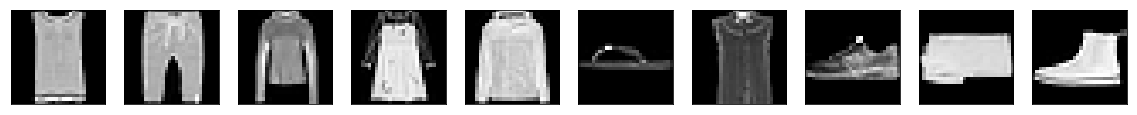

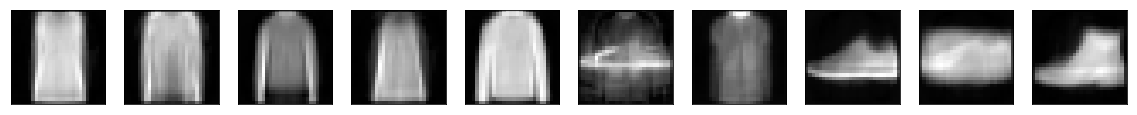

In [51]:
bastien_utils.plot_all_images(x_small)
bastien_utils.plot_all_images(autoencoder.predict(x_small))

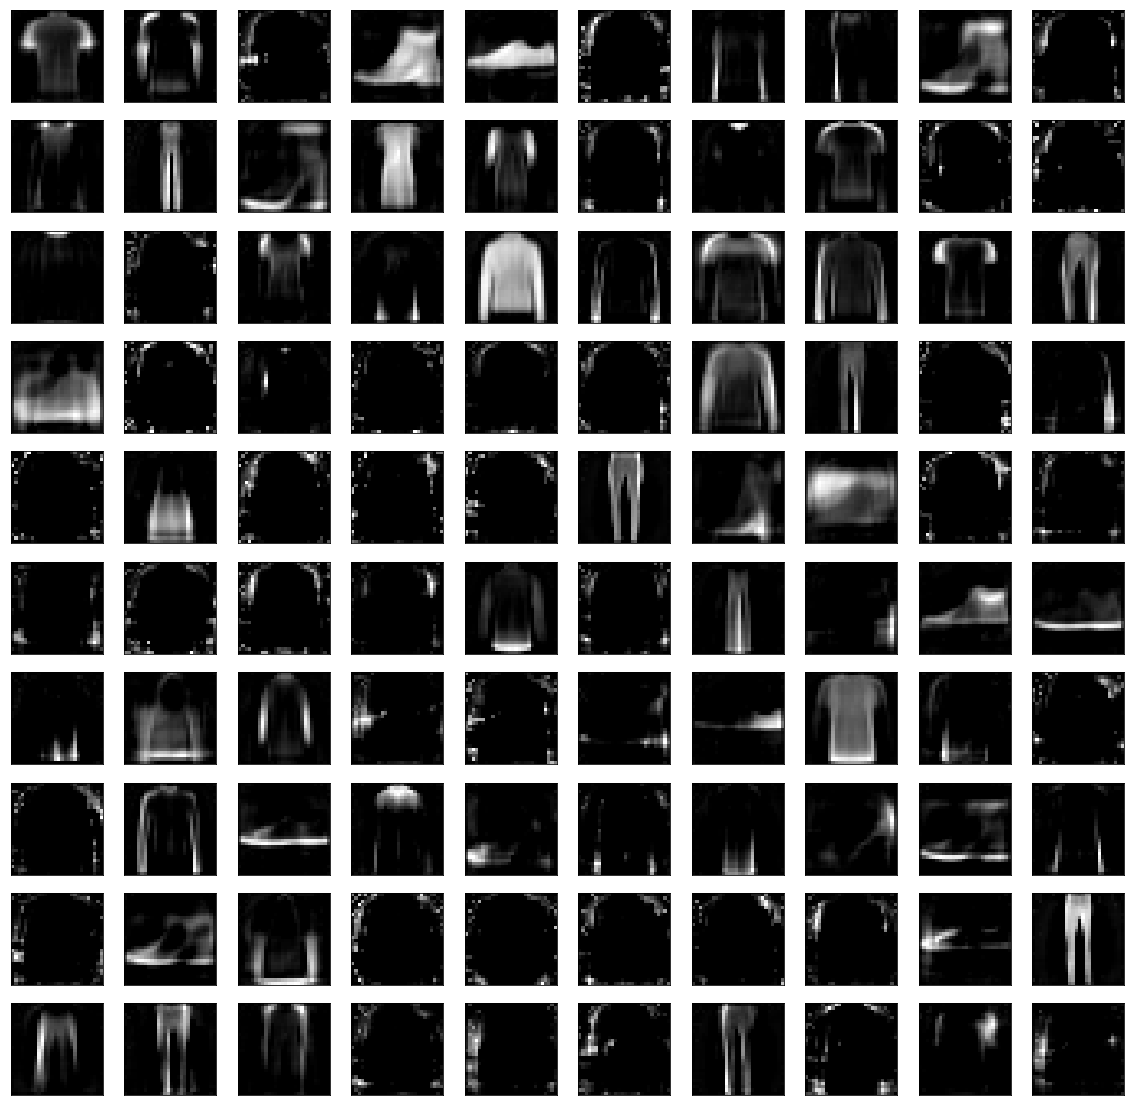

In [52]:
bastien_utils.plot_all_images(decoder.get_weights()[0].reshape((100,28,28,1)))

In [1]:
from sklearn import svm